# Project Supervised Learning: INN Hotels Project



### Context

A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impacts a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests





### Objective

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.



### Data Description

The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.

Data Dictionary

* Booking_ID: the unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
* Not Selected – No meal plan selected
* Meal Plan 1 – Breakfast
* Meal Plan 2 – Half board (breakfast and one other meal)
* Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer before the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer before the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

### Problem Definition

We need to analyze customer booking data for INN Hotels Group to identify key factors influencing booking cancellations and develop a machine learning model to predict cancellations in advance. By understanding patterns such as customer behavior, booking lead time, pricing sensitivity, and other critical variables, the analysis will enable the identification of high-risk bookings. Additionally, actionable insights will be provided to formulate profitable policies for cancellations and refunds, helping the hotel minimize revenue loss, reduce operational inefficiencies, and optimize its pricing and cancellation strategies for sustainable growth.

### EDA Questions to be answered

1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

### Importing the required libraries

In [110]:
# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
from sklearn.linear_model import LogisticRegression

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    precision_recall_curve,
    r2_score,
    mean_squared_error,
    mean_absolute_error
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

### Data Background and Contents

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading the data and Displaying first few rows of data

In [7]:
# read the data
data = pd.read_csv('/content/drive/My Drive/ColabNotebooks/INNHotelsGroup.csv')
# returns the first 5 rows
data.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [8]:
data.tail()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
36270   INN36271             3               0                     2   
36271   INN36272             2               0                     1   
36272   INN36273             2               0                     2   
36273   INN36274             2               0                     0   
36274   INN36275             2               0                     1   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
36270                  6       Meal Plan 1                           0   
36271                  3       Meal Plan 1                           0   
36272                  6       Meal Plan 1                           0   
36273                  3      Not Selected                           0   
36274                  2       Meal Plan 1                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
36270        Room_Type 4         85          2018              8   
36271        Room_Type 1        228          2018             10   
36272        Room_Type 1        148          2018              7   
36273        Room_Type 1         63          2018              4   
36274        Room_Type 1        207          2018             12   

       arrival_date market_segment_type  repeated_guest  \
36270             3              Online               0   
36271            17              Online               0   
36272             1              Online               0   
36273            21              Online               0   
36274            30             Offline               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
36270                             0                                     0   
36271                             0                                     0   
36272                             0                                     0   
36273                             0                                     0   
36274                             0                                     0   

       avg_price_per_room  no_of_special_requests booking_status  
36270              167.80                       1   Not_Canceled  
36271               90.95                       2       Canceled  
36272               98.39                       2   Not_Canceled  
36273               94.50                       0       Canceled  
36274              161.67                       0   Not_Canceled

Checking Shape of the dataset

In [9]:
data.shape

(36275, 19)

* There is a total of 36275 rows for the 19 columns mentioned above.

Checking datatypes of columns in the dataset

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

* There are a total of 19 columns and 36,275 observations in the dataset.
* The dataset has 13 continuous variables (e.g., lead_time, avg_price_per_room) and 5 categorical variables (e.g., type_of_meal_plan, booking_status).
* There are no missing values in the dataset.

Checking for duplicate values

In [11]:
data.duplicated().sum()

0

Checking for missing values

In [12]:
data.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values

Statistical Summary of Dataset

In [13]:
data.describe()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
count  36275.000000    36275.000000          36275.000000       36275.000000   
mean       1.844962        0.105279              0.810724           2.204300   
std        0.518715        0.402648              0.870644           1.410905   
min        0.000000        0.000000              0.000000           0.000000   
25%        2.000000        0.000000              0.000000           1.000000   
50%        2.000000        0.000000              1.000000           2.000000   
75%        2.000000        0.000000              2.000000           3.000000   
max        4.000000       10.000000              7.000000          17.000000   

       required_car_parking_space     lead_time  arrival_year  arrival_month  \
count                36275.000000  36275.000000  36275.000000   36275.000000   
mean                     0.030986     85.232557   2017.820427       7.423653   
std                      0.173281     85.930817      0.383836       3.069894   
min                      0.000000      0.000000   2017.000000       1.000000   
25%                      0.000000     17.000000   2018.000000       5.000000   
50%                      0.000000     57.000000   2018.000000       8.000000   
75%                      0.000000    126.000000   2018.000000      10.000000   
max                      1.000000    443.000000   2018.000000      12.000000   

       arrival_date  repeated_guest  no_of_previous_cancellations  \
count  36275.000000    36275.000000                  36275.000000   
mean      15.596995        0.025637                      0.023349   
std        8.740447        0.158053                      0.368331   
min        1.000000        0.000000                      0.000000   
25%        8.000000        0.000000                      0.000000   
50%       16.000000        0.000000                      0.000000   
75%       23.000000        0.000000                      0.000000   
max       31.000000        1.000000                     13.000000   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
count                          36275.000000        36275.000000   
mean                               0.153411          103.423539   
std                                1.754171           35.089424   
min                                0.000000            0.000000   
25%                                0.000000           80.300000   
50%                                0.000000           99.450000   
75%                                0.000000          120.000000   
max                               58.000000          540.000000   

       no_of_special_requests  
count            36275.000000  
mean                 0.619655  
std                  0.786236  
min                  0.000000  
25%                  0.000000  
50%                  0.000000  
75%                  1.000000  
max                  5.000000

# Observations

* The average number of weekend nights is 0.81, while weeknights average 2.20, indicating most stays are short, with a median of 1 weekend night and 2 weeknights.

* Lead time has a wide range (0–443 days) and a high standard deviation (85.93), showing significant variability in how far in advance bookings are made.

* Most bookings have 0 special requests, with the median being 0, but the maximum number of requests is 5, suggesting that special requests are uncommon but can occur.
* The average price per room is ₹103.42, with a standard deviation of ₹35.09, while the maximum price reaches ₹540, showing variability in room pricing.

# Exploratory Data Analysis

In [14]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )

    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

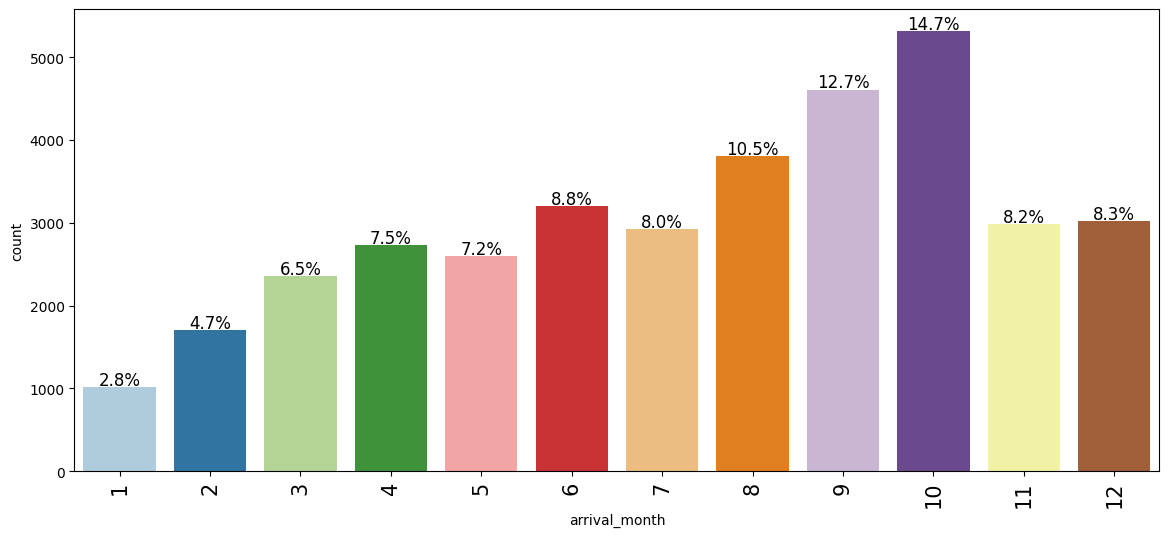

In [17]:
labeled_barplot(data, 'arrival_month', perc=True, n=None)

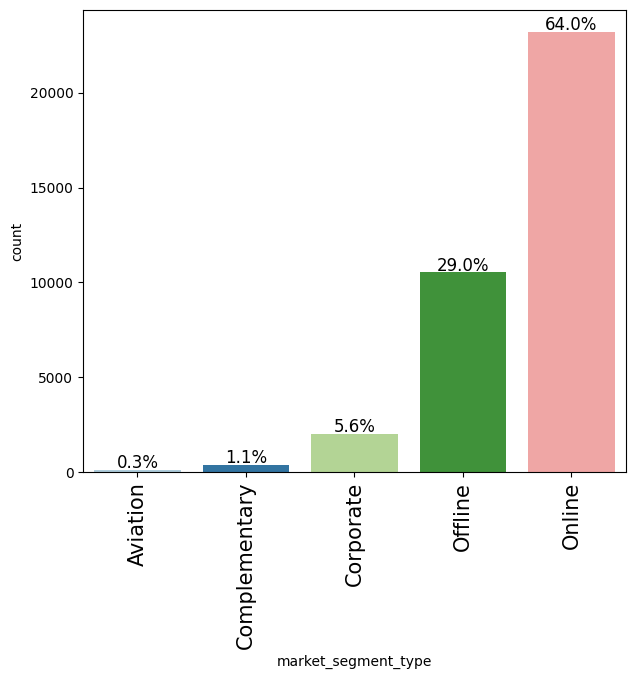

In [18]:
labeled_barplot(data, 'market_segment_type', perc=True, n=None)

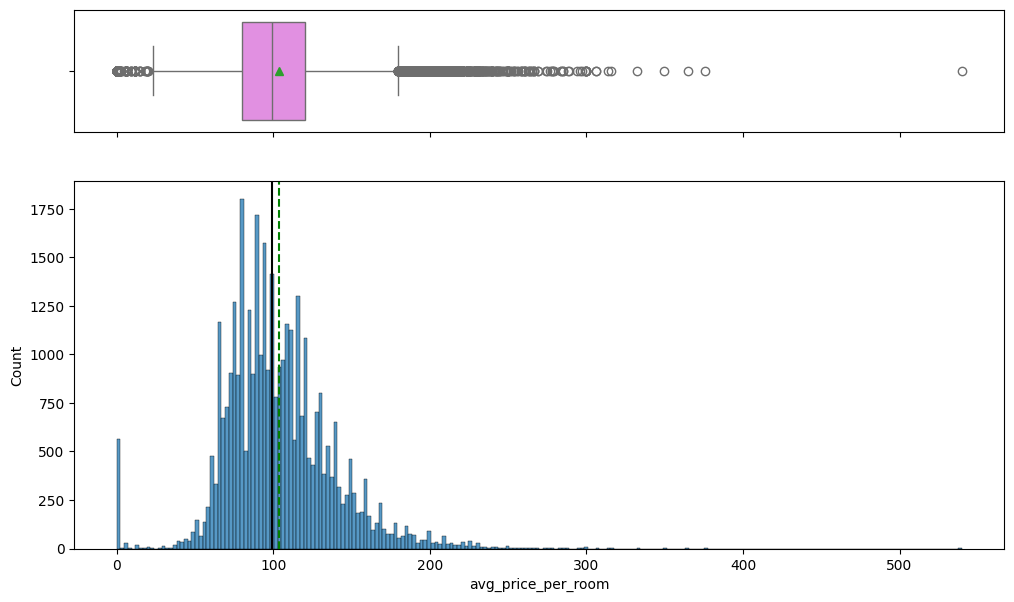

In [19]:
histogram_boxplot(data, 'avg_price_per_room')

In [20]:
# how many free rooms does the hotel give away?
data[data['avg_price_per_room']==0]

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
63      INN00064             1               0                     0   
145     INN00146             1               0                     0   
209     INN00210             1               0                     0   
266     INN00267             1               0                     0   
267     INN00268             1               0                     2   
...          ...           ...             ...                   ...   
35983   INN35984             1               0                     0   
36080   INN36081             1               0                     1   
36114   INN36115             1               0                     0   
36217   INN36218             2               0                     2   
36250   INN36251             1               0                     0   

       no_of_week_nights type_of_meal_plan  required_car_parking_space  \
63                     1       Meal Plan 1                           0   
145                    2       Meal Plan 1                           0   
209                    0       Meal Plan 1                           0   
266                    2       Meal Plan 1                           0   
267                    1       Meal Plan 1                           0   
...                  ...               ...                         ...   
35983                  1       Meal Plan 1                           0   
36080                  1       Meal Plan 1                           0   
36114                  1       Meal Plan 1                           0   
36217                  1       Meal Plan 1                           0   
36250                  2       Meal Plan 2                           0   

      room_type_reserved  lead_time  arrival_year  arrival_month  \
63           Room_Type 1          2          2017              9   
145          Room_Type 1         13          2018              6   
209          Room_Type 1          4          2018              2   
266          Room_Type 1          1          2017              8   
267          Room_Type 1          4          2017              8   
...                  ...        ...           ...            ...   
35983        Room_Type 7          0          2018              6   
36080        Room_Type 7          0          2018              3   
36114        Room_Type 1          1          2018              3   
36217        Room_Type 2          3          2017              8   
36250        Room_Type 1          6          2017             12   

       arrival_date market_segment_type  repeated_guest  \
63               10       Complementary               0   
145               1       Complementary               1   
209              27       Complementary               0   
266              12       Complementary               1   
267              23       Complementary               0   
...             ...                 ...             ...   
35983             7       Complementary               1   
36080            21       Complementary               1   
36114             2              Online               0   
36217             9              Online               0   
36250            10              Online               0   

       no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
63                                0                                     0   
145                               3                                     5   
209                               0                                     0   
266                               0                                     1   
267                               0                                     0   
...                             ...                                   ...   
35983                             4                                    17   
36080                             3                                    15   
36114                            

In [21]:
data.loc[data['avg_price_per_room']==0, 'market_segment_type'].value_counts()

market_segment_type
Complementary    354
Online           191
Name: count, dtype: int64

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

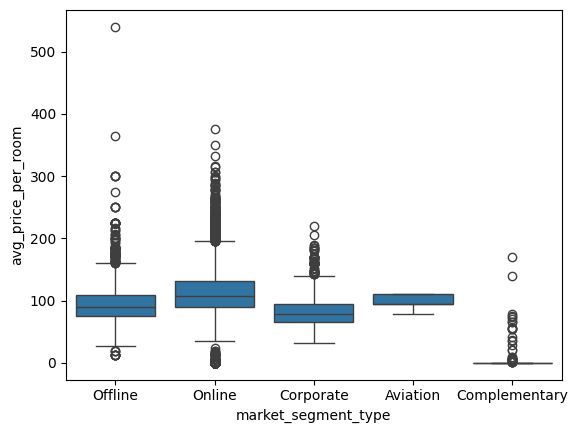

In [22]:
sns.boxplot(data=data, y='avg_price_per_room' , x='market_segment_type')

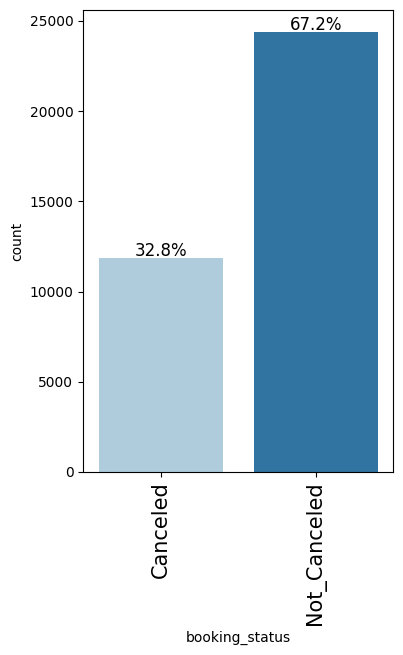

In [23]:
labeled_barplot(data, 'booking_status', perc=True, n=None)

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


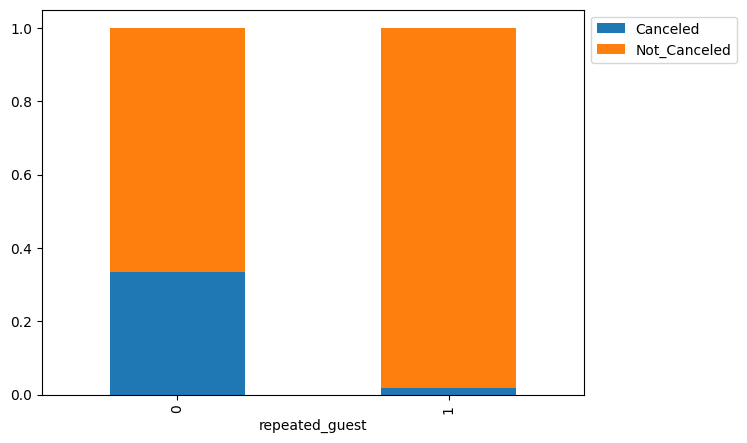

In [24]:
stacked_barplot(data,'repeated_guest','booking_status')

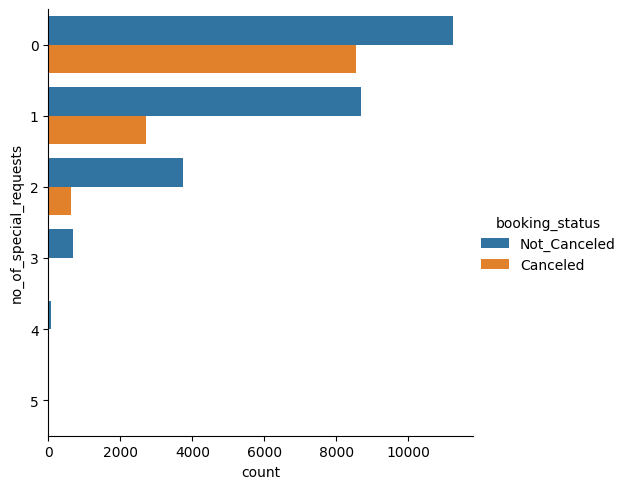

In [25]:
sns.catplot(data=data, y='no_of_special_requests', hue='booking_status', kind='count' )

# EDA Questions and Answers
**1. What are the busiest months in the hotel?**  
- October is the busiest month, accounting for 14.7% of total bookings for the year.  

**2. Which market segment do most guests come from?**  
- The majority of bookings, 64% (23,214 bookings), are made through online channels.  

**3. Hotel rates are dynamic and change according to demand and customer demographics. How do room prices vary across different market segments?**  
- Online bookings have the highest prices despite offering the most complimentary rooms (likely redeemed through loyalty points). Aviation, Offline, and Corporate bookings have slightly lower prices, with Corporate bookings being the lowest on average. Complimentary bookings are, as expected, free of charge.  

**4. What percentage of bookings are canceled?**  
- Approximately one-third of bookings (11,885) are canceled in the dataset.  

**5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?**  
- Repeating guests rarely cancel, with only 1.75% of their bookings being canceled.  

**6. Many guests have special requirements when booking a hotel room. Do special requests affect booking cancellations?**  
- Guests with no special requests are more likely to cancel. Adding one special request slightly reduces cancellations, and with each additional request (up to three), the likelihood of cancellation progressively decreases to nearly zero.  

## Univariate Analysis

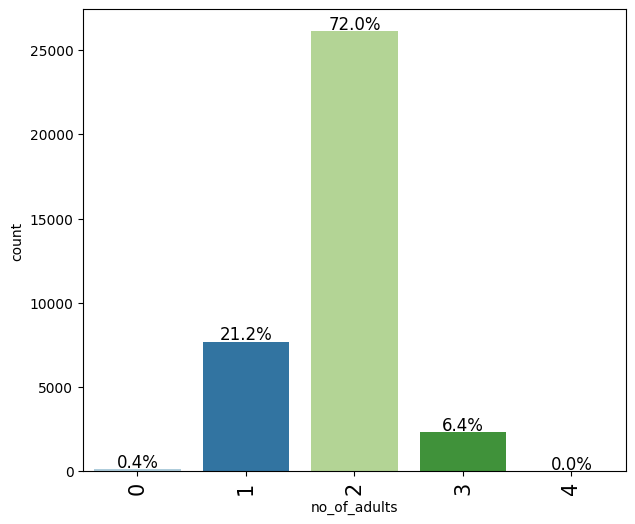

In [26]:
labeled_barplot(data, 'no_of_adults', perc=True)

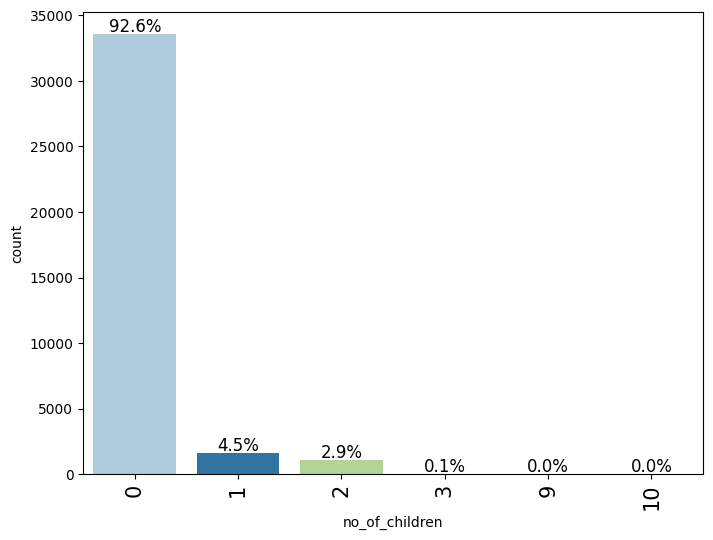

In [27]:
labeled_barplot(data, 'no_of_children', perc=True)

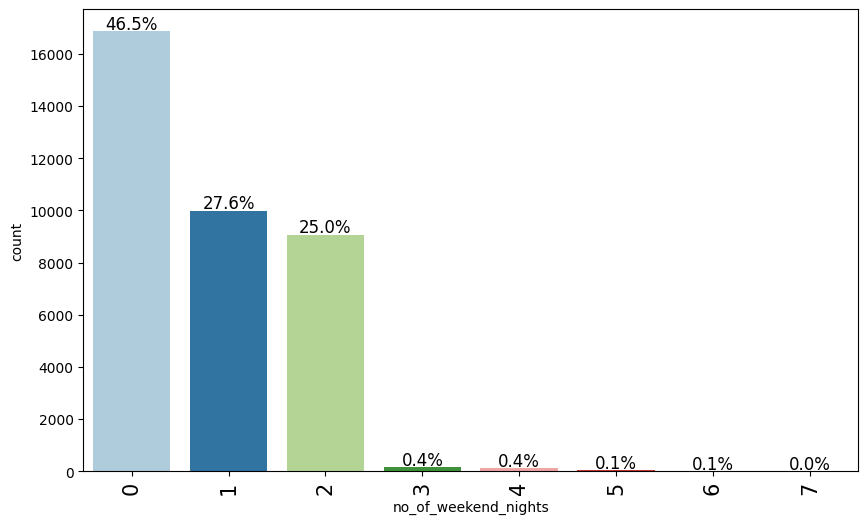

In [28]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

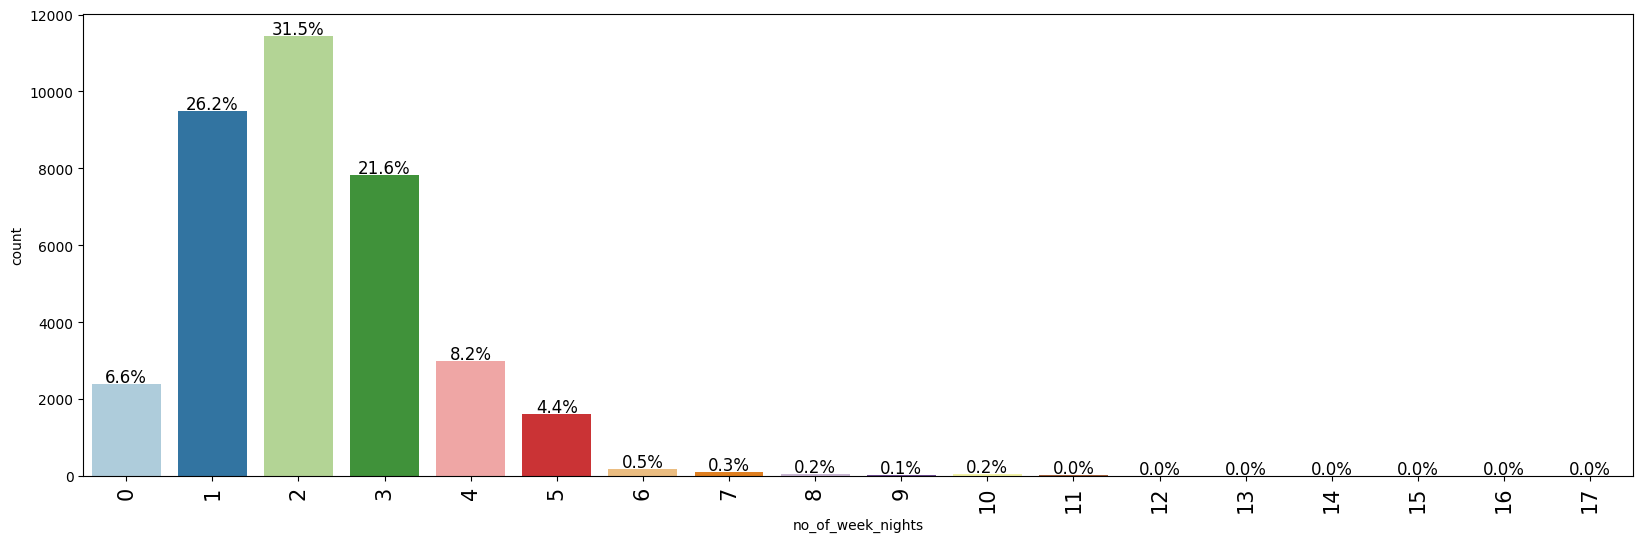

In [29]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

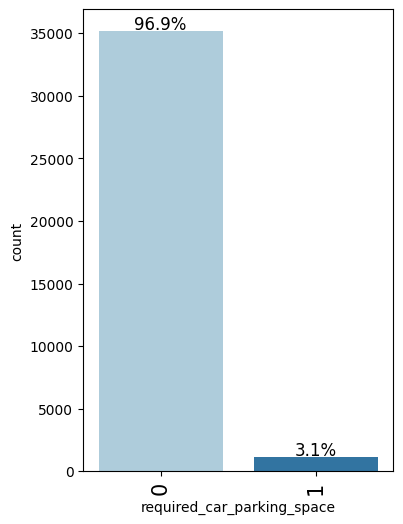

In [30]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

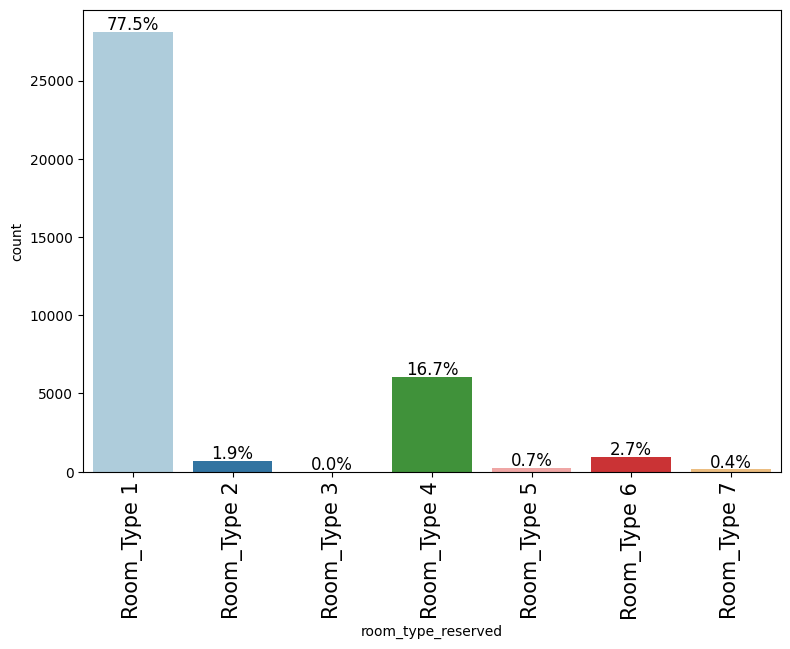

In [31]:
labeled_barplot(data, 'room_type_reserved', perc=True)

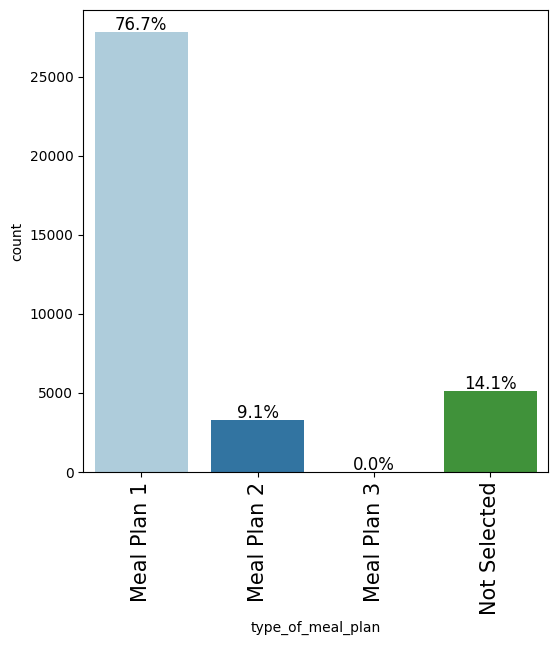

In [32]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

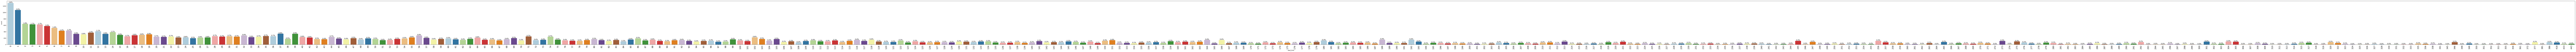

In [33]:
labeled_barplot(data, 'lead_time', perc=True)

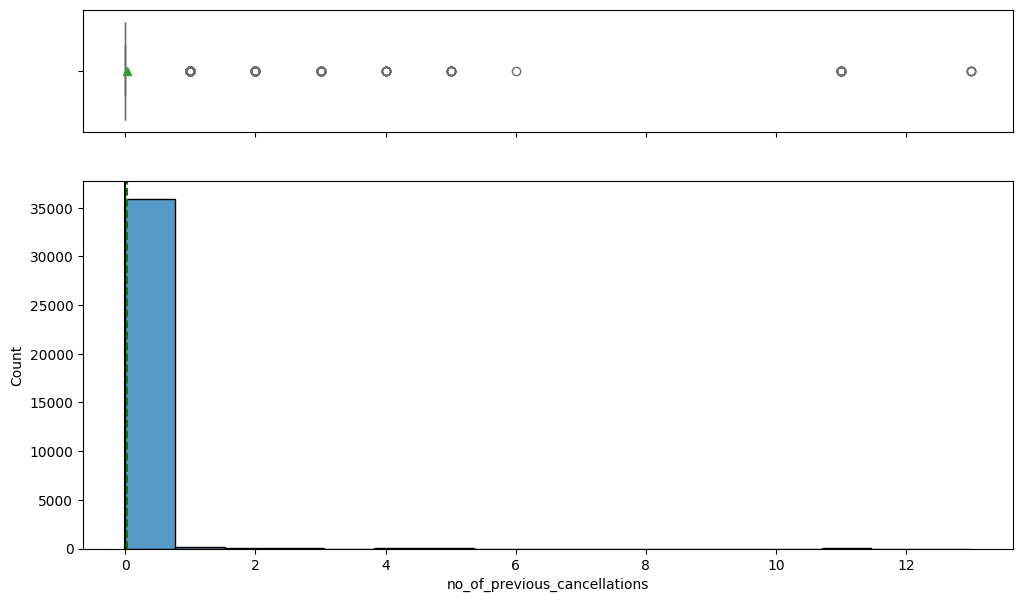

In [34]:
histogram_boxplot(data, 'no_of_previous_cancellations')

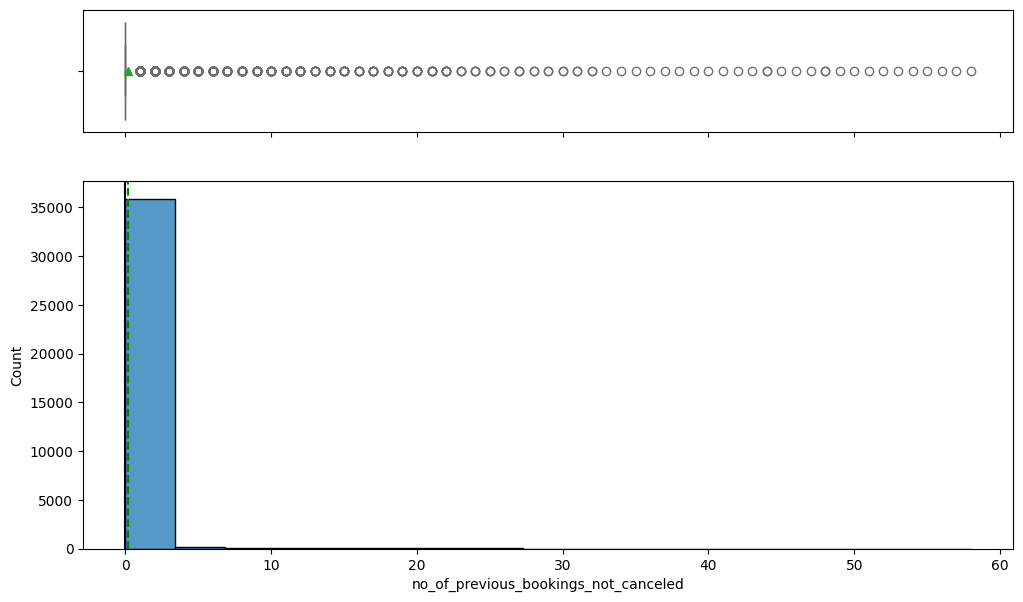

In [35]:
histogram_boxplot(data, 'no_of_previous_bookings_not_canceled')

<Axes: >

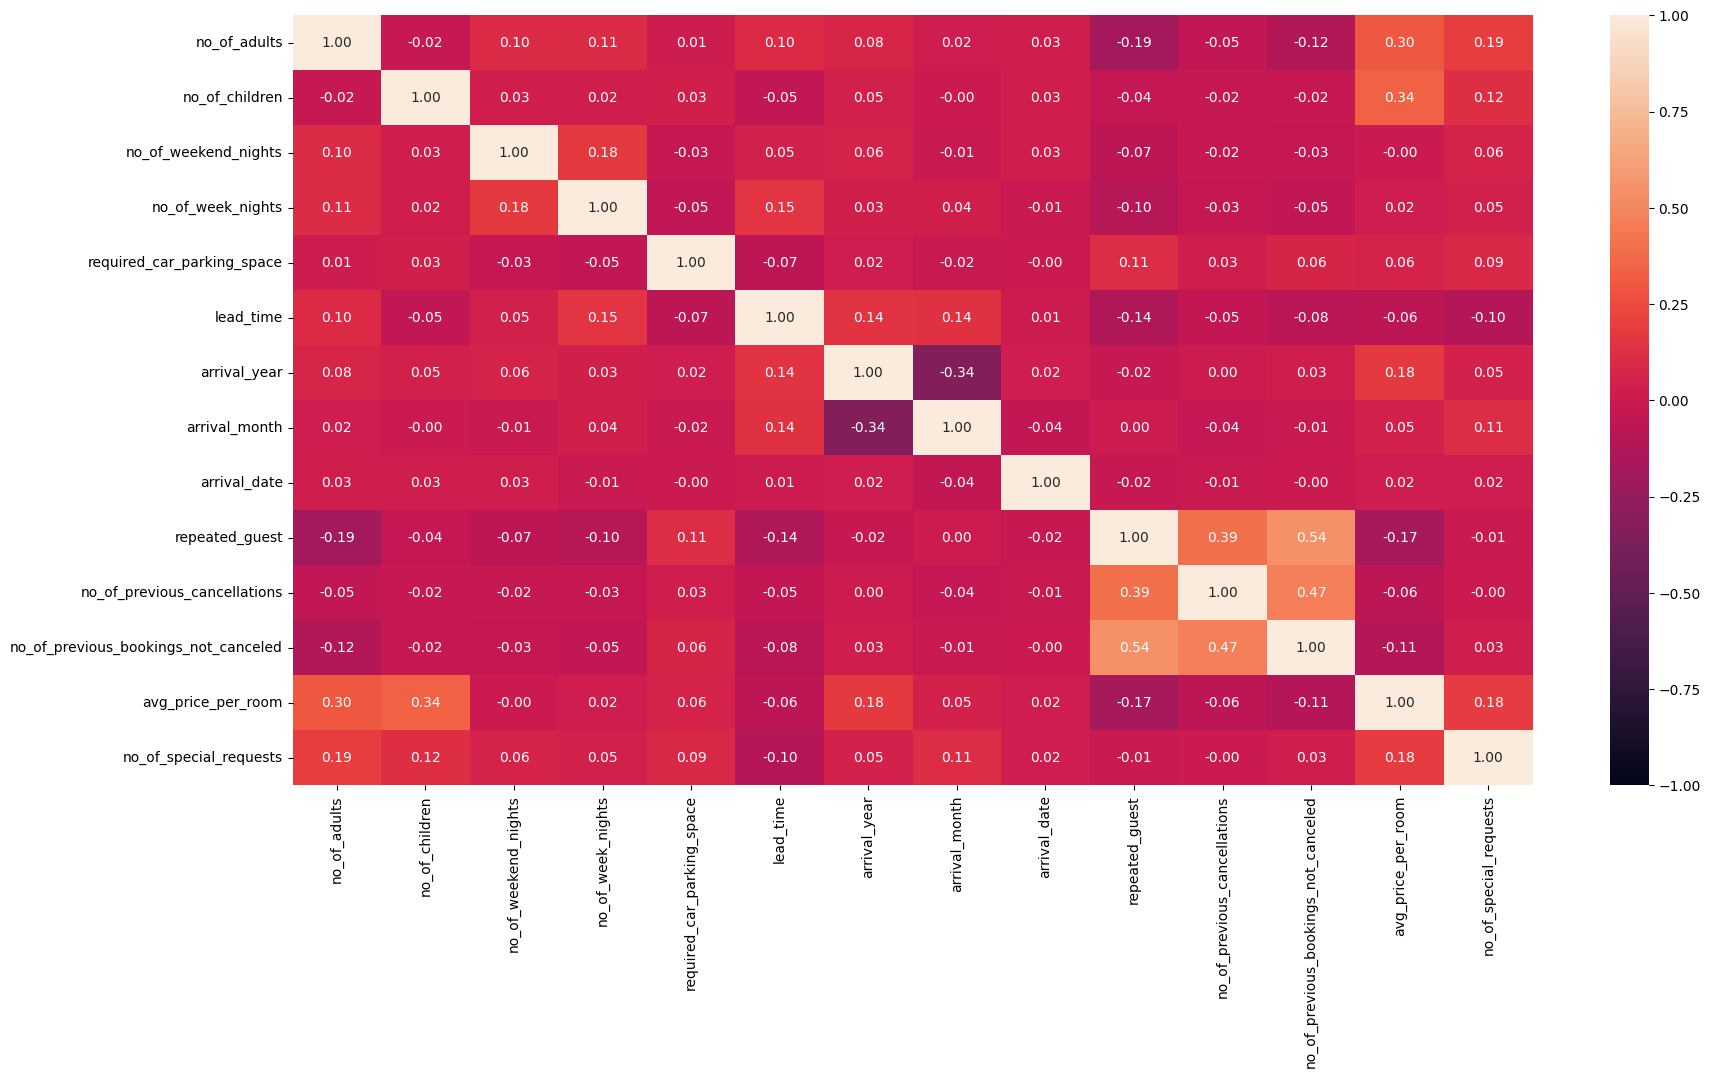

In [36]:
plt.figure(figsize=(20,10))
# Only include numerical features for correlation calculation
numerical_data = data.select_dtypes(include=np.number)
sns.heatmap(numerical_data.corr(), annot=True, vmin=-1, vmax=1, fmt='.2f')

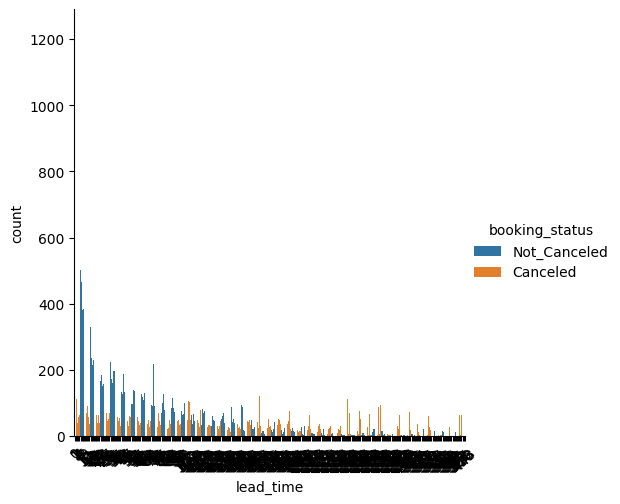

In [37]:
# how does lead time effect cancellation
sns.catplot(data=data, x='lead_time', hue='booking_status', kind='count' )
plt.xticks(rotation=45)
plt.show()

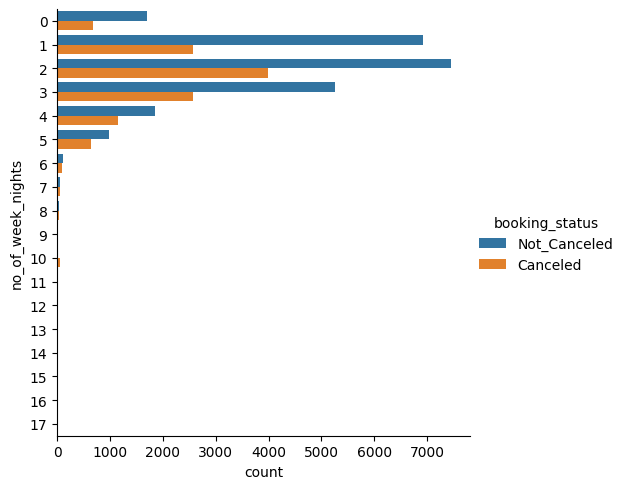

In [38]:
# do weekends v weekday have differnt patterns on cancelation?
sns.catplot(data=data, y='no_of_week_nights', hue='booking_status', kind='count' )
plt.show()

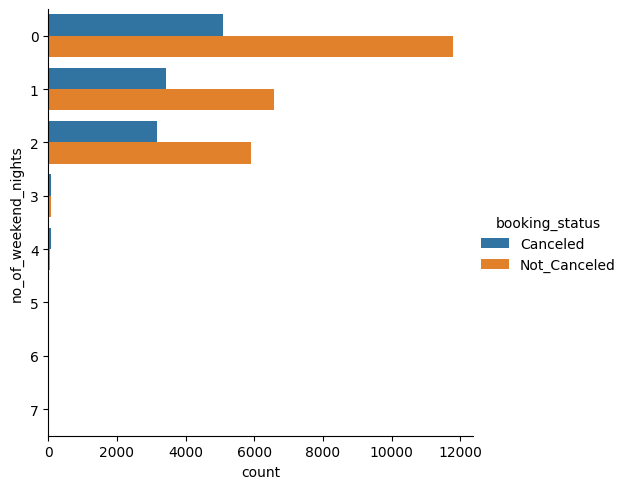

In [39]:
sns.catplot(data=data, y='no_of_weekend_nights', hue='booking_status', kind='count' )
plt.show()

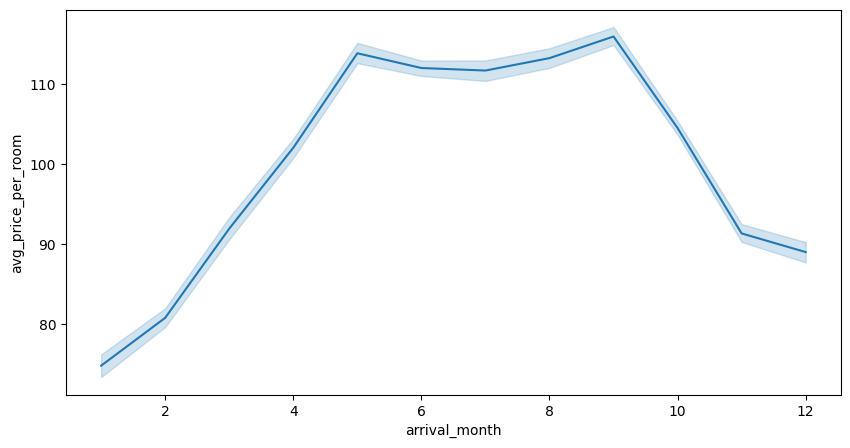

In [40]:
# having established that some months are busier than others, does priceing for that demand exist in the data?
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room')
plt.show()

In [41]:
# New column for lenght of stay
data['length_stay'] = data['no_of_weekend_nights'] + data['no_of_week_nights']

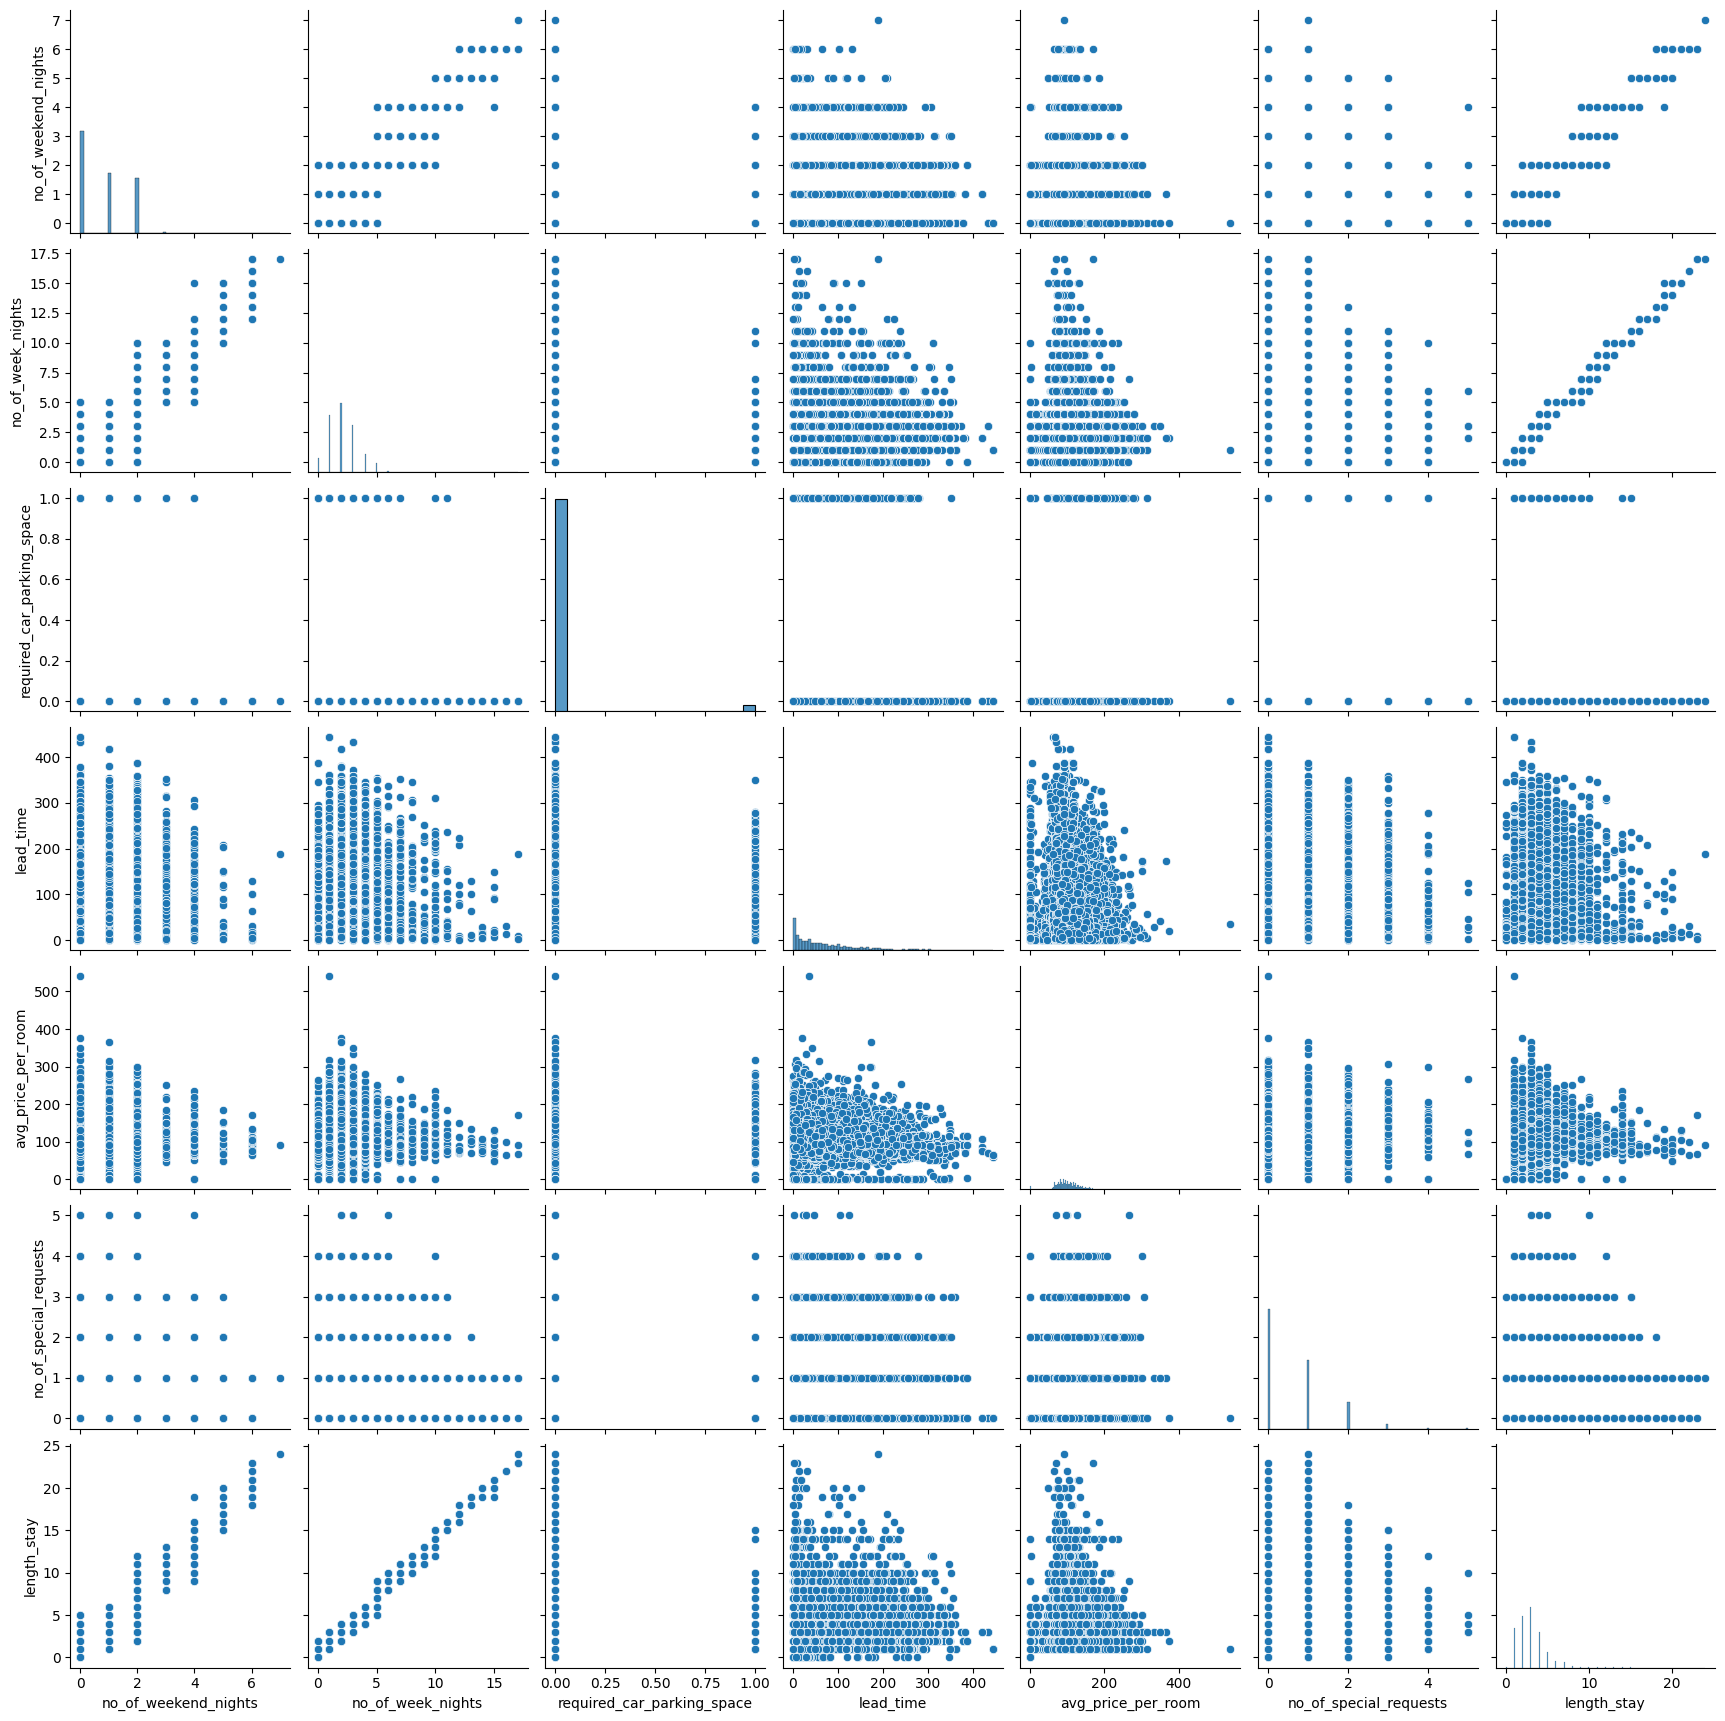

In [42]:
sns.pairplot(data[['no_of_weekend_nights','no_of_week_nights','required_car_parking_space',
                   'lead_time','avg_price_per_room','no_of_special_requests','type_of_meal_plan',
                   'room_type_reserved','market_segment_type','booking_status','length_stay']]);

## Data Preprocessing

In [43]:
data.loc[data['booking_status']=='Not_Canceled','booking_status'] = False
data.loc[data['booking_status']=='Canceled','booking_status'] = True

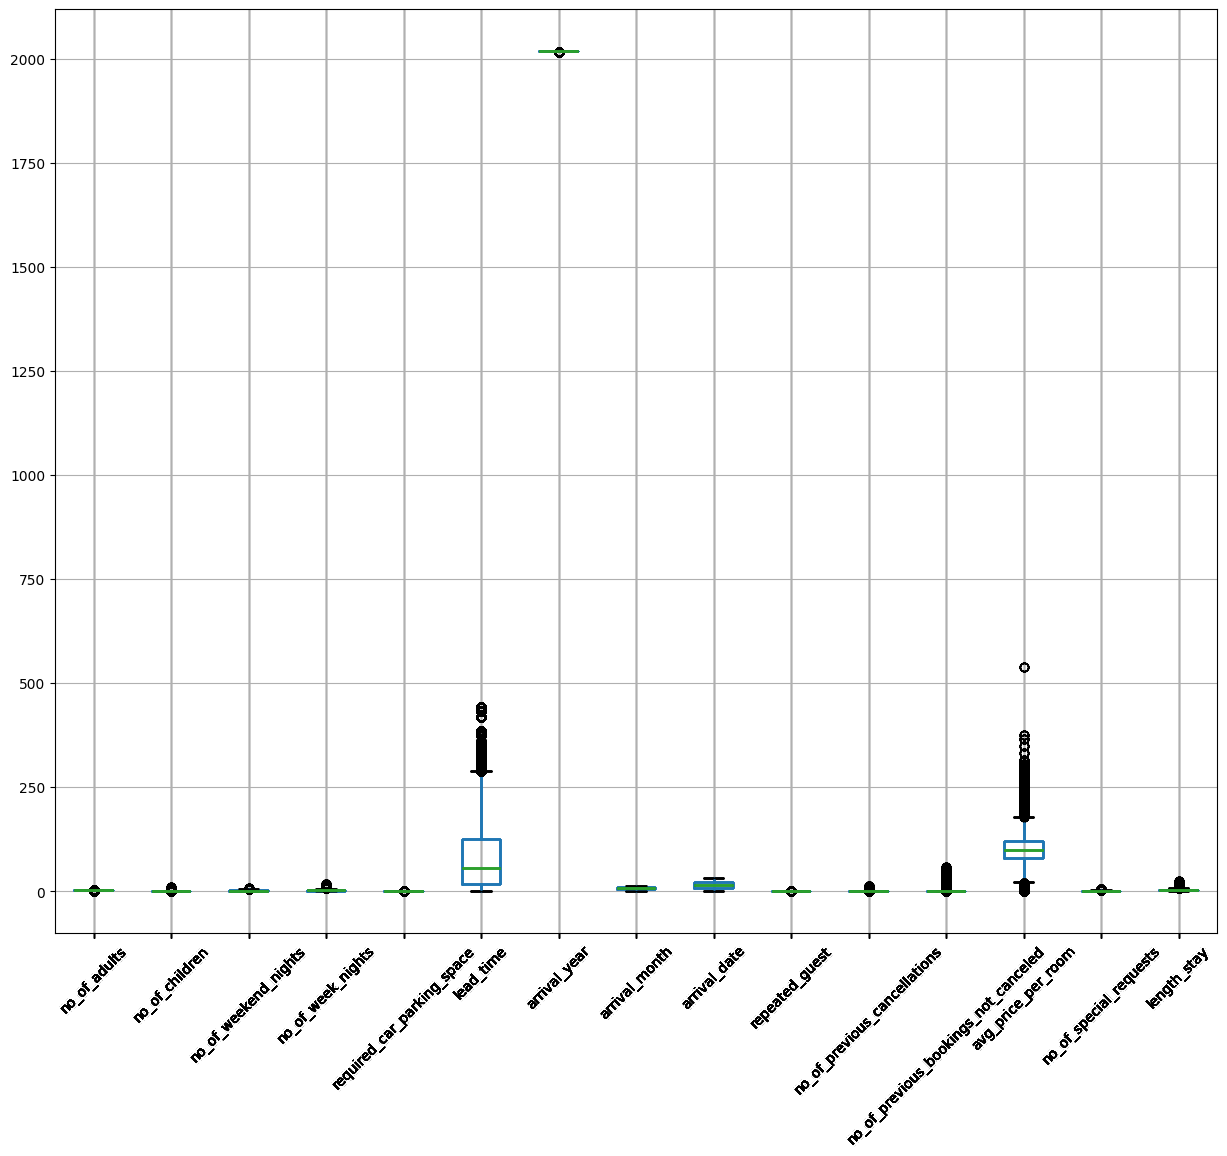

In [44]:
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
# drop column because they were either time, or not helpful
numeric_columns.remove("arrival_year")


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    data.boxplot()

plt.xticks(rotation=45)
plt.show()

The columns lead_time and avg_room_price contain significant outliers. I plan to address this by applying a logarithmic transformation to avg_room_price, while handling the outliers in lead_time through binning.

In [45]:
#Solving the IQR fro avg price room
quartiles = np.quantile(data['avg_price_per_room'][data['avg_price_per_room'].notnull()], [.25, .75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}')
outlier_powers = data.loc[np.abs(data['avg_price_per_room'] - data['avg_price_per_room'].median()) > power_4iqr, 'avg_price_per_room']
outlier_powers.shape

Q1 = 80.3, Q3 = 120.0, 4*IQR = 158.8


(49,)

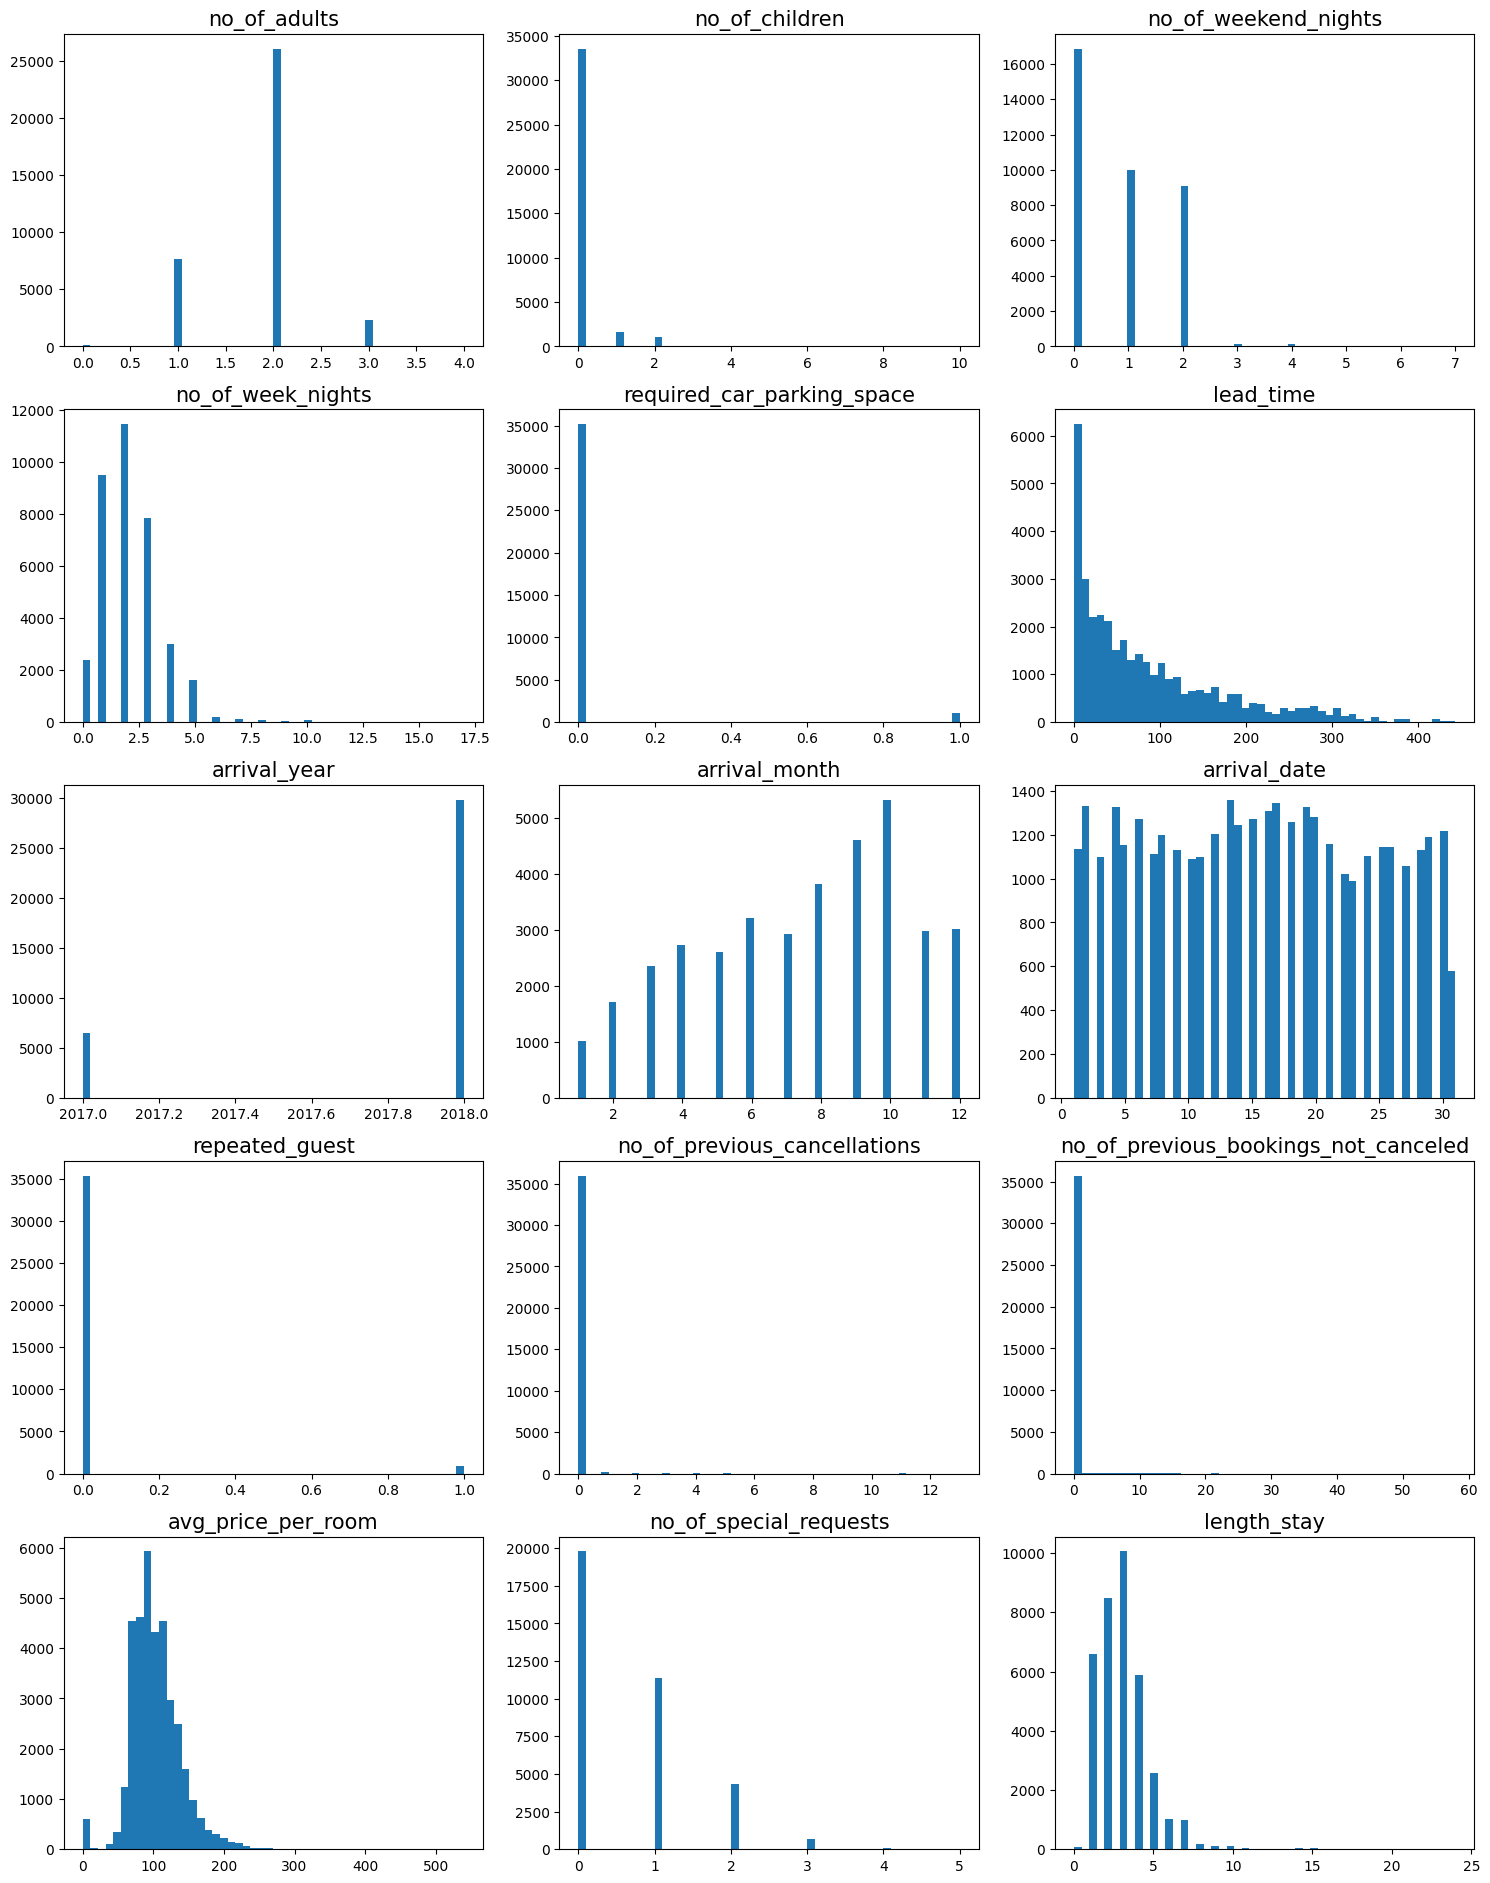

In [46]:
# creating a list of columns
dist_cols = [
    item for item in data.select_dtypes(include=np.number).columns
]

plt.figure(figsize=(15, 45))
#looping the list and ploting histograms
for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data[dist_cols[i]], bins=50)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=15)

plt.show()


In [47]:
data2 = data.copy()
# removing because they are close to normal
dist_cols.remove('no_of_week_nights')
dist_cols.remove('no_of_adults')
dist_cols.remove('length_stay')
dist_cols.remove('avg_price_per_room')
# removing becasue they are boolean or time related.
dist_cols.remove('arrival_year')
dist_cols.remove('required_car_parking_space')
dist_cols.remove('arrival_date')
dist_cols.remove('arrival_month')
dist_cols.remove('repeated_guest')
# removing becasue I have a different treatment in mind
dist_cols.remove('lead_time')

In [48]:
# using log transforms on some columns
for col in dist_cols:
    data2[col + "_log"] = np.log(data2[col] + 1)

# dropping the original columns
data2.drop(dist_cols, axis=1, inplace=True)
data2.head()

Booking_ID  no_of_adults  no_of_week_nights type_of_meal_plan  \
0   INN00001             2                  2       Meal Plan 1   
1   INN00002             2                  3      Not Selected   
2   INN00003             1                  1       Meal Plan 1   
3   INN00004             2                  2       Meal Plan 1   
4   INN00005             2                  1      Not Selected   

   required_car_parking_space room_type_reserved  lead_time  arrival_year  \
0                           0        Room_Type 1        224          2017   
1                           0        Room_Type 1          5          2018   
2                           0        Room_Type 1          1          2018   
3                           0        Room_Type 1        211          2018   
4                           0        Room_Type 1         48          2018   

   arrival_month  arrival_date market_segment_type  repeated_guest  \
0             10             2             Offline               0   
1             11             6              Online               0   
2              2            28              Online               0   
3              5            20              Online               0   
4              4            11              Online               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0               65.00          False            3                 0.0   
1              106.68          False            5                 0.0   
2               60.00           True            3                 0.0   
3              100.00           True            2                 0.0   
4               94.50           True            2                 0.0   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                  0.693147                               0.0   
1                  1.098612                               0.0   
2                  1.098612                               0.0   
3                  0.000000                               0.0   
4                  0.693147                               0.0   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  
0                                       0.0                    0.000000  
1                                       0.0                    0.693147  
2                                       0.0                    0.000000  
3                                       0.0                    0.000000  
4                                       0.0                    0.000000

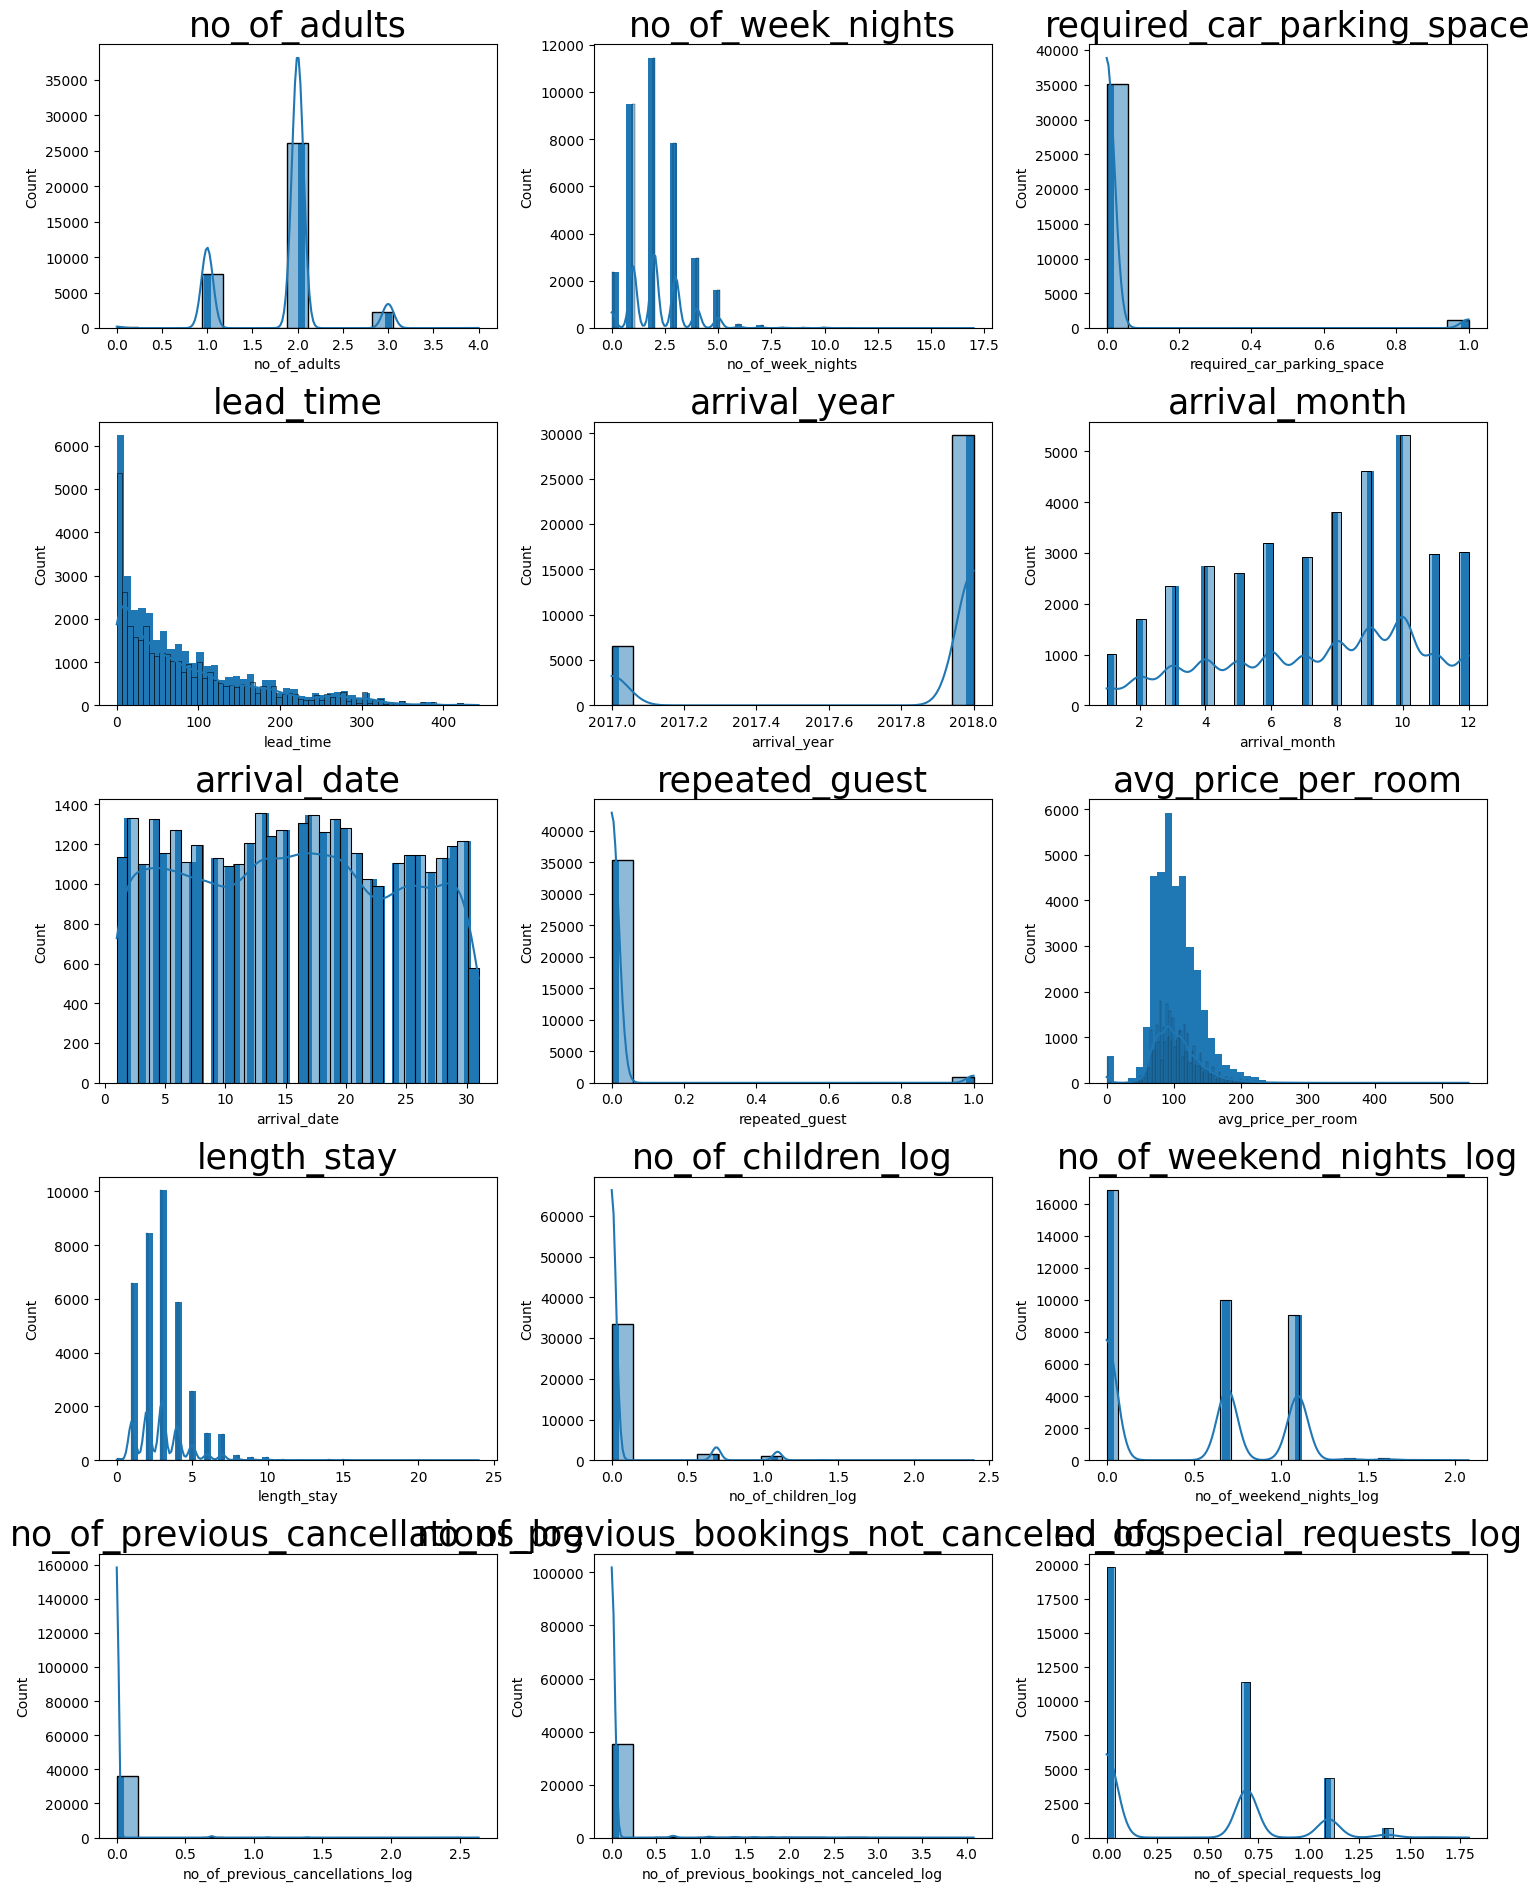

In [49]:
# viewing the distributions after the log transformation.
dist_cols = [
    item for item in data2.select_dtypes(include=np.number).columns
]

#  plot histogram of all numeric columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    plt.hist(data2[dist_cols[i]], bins=50)
    sns.histplot(data=data2, x=dist_cols[i], kde=True)
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()


In [50]:
# OneHotEncoding catergorical variables
dummy_data = pd.get_dummies (
    data2,
    columns = [
        'type_of_meal_plan',
        'room_type_reserved',
        'market_segment_type',
    ],
    drop_first=True,
)
dummy_data.head()

Booking_ID  no_of_adults  no_of_week_nights  required_car_parking_space  \
0   INN00001             2                  2                           0   
1   INN00002             2                  3                           0   
2   INN00003             1                  1                           0   
3   INN00004             2                  2                           0   
4   INN00005             2                  1                           0   

   lead_time  arrival_year  arrival_month  arrival_date  repeated_guest  \
0        224          2017             10             2               0   
1          5          2018             11             6               0   
2          1          2018              2            28               0   
3        211          2018              5            20               0   
4         48          2018              4            11               0   

   avg_price_per_room booking_status  length_stay  no_of_children_log  \
0               65.00          False            3                 0.0   
1              106.68          False            5                 0.0   
2               60.00           True            3                 0.0   
3              100.00           True            2                 0.0   
4               94.50           True            2                 0.0   

   no_of_weekend_nights_log  no_of_previous_cancellations_log  \
0                  0.693147                               0.0   
1                  1.098612                               0.0   
2                  1.098612                               0.0   
3                  0.000000                               0.0   
4                  0.693147                               0.0   

   no_of_previous_bookings_not_canceled_log  no_of_special_requests_log  \
0                                       0.0                    0.000000   
1                                       0.0                    0.693147   
2                                       0.0                    0.000000   
3                                       0.0                    0.000000   
4                                       0.0                    0.000000   

   type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
0                          False                          False   
1                          False                          False   
2                          False                          False   
3                          False                          False   
4                          False                          False   

   type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 2  \
0                           False                           False   
1                            True                           False   
2                           False                           False   
3                           False                           False   
4                            True                           False   

   room_type_reserved_Room_Type 3  room_type_reserved_Room_Type 4  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
0                           False                           False   
1                           False                           False   
2                           False                           False   
3                           False                           False   
4                           False                           False   

   room_type_reserved_Room_Type 7  market_segment_type_Complementary  \
0                           False                              False   
1              

In [51]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 30 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Booking_ID                                36275 non-null  object 
 1   no_of_adults                              36275 non-null  int64  
 2   no_of_week_nights                         36275 non-null  int64  
 3   required_car_parking_space                36275 non-null  int64  
 4   lead_time                                 36275 non-null  int64  
 5   arrival_year                              36275 non-null  int64  
 6   arrival_month                             36275 non-null  int64  
 7   arrival_date                              36275 non-null  int64  
 8   repeated_guest                            36275 non-null  int64  
 9   avg_price_per_room                        36275 non-null  float64
 10  booking_status                    

In [52]:
dummied_cut = pd.cut(dummy_data['lead_time'], 5, labels=['lat_min','short','med','long','advanced'])
dummied_cut.head(10)

0        med
1    lat_min
2    lat_min
3        med
4    lat_min
5       long
6    lat_min
7    lat_min
8      short
9    lat_min
Name: lead_time, dtype: category
Categories (5, object): ['lat_min' < 'short' < 'med' < 'long' < 'advanced']

In [53]:
data3 = pd.merge(dummy_data, dummied_cut, left_index=True, right_index=True)

data3.head().T

0         1         2  \
Booking_ID                                INN00001  INN00002  INN00003   
no_of_adults                                     2         2         1   
no_of_week_nights                                2         3         1   
required_car_parking_space                       0         0         0   
lead_time_x                                    224         5         1   
arrival_year                                  2017      2018      2018   
arrival_month                                   10        11         2   
arrival_date                                     2         6        28   
repeated_guest                                   0         0         0   
avg_price_per_room                            65.0    106.68      60.0   
booking_status                               False     False      True   
length_stay                                      3         5         3   
no_of_children_log                             0.0       0.0       0.0   
no_of_weekend_nights_log                  0.693147  1.098612  1.098612   
no_of_previous_cancellations_log               0.0       0.0       0.0   
no_of_previous_bookings_not_canceled_log       0.0       0.0       0.0   
no_of_special_requests_log                     0.0  0.693147       0.0   
type_of_meal_plan_Meal Plan 2                False     False     False   
type_of_meal_plan_Meal Plan 3                False     False     False   
type_of_meal_plan_Not Selected               False      True     False   
room_type_reserved_Room_Type 2               False     False     False   
room_type_reserved_Room_Type 3               False     False     False   
room_type_reserved_Room_Type 4               False     False     False   
room_type_reserved_Room_Type 5               False     False     False   
room_type_reserved_Room_Type 6               False     False     False   
room_type_reserved_Room_Type 7               False     False     False   
market_segment_type_Complementary            False     False     False   
market_segment_type_Corporate                False     False     False   
market_segment_type_Offline                   True     False     False   
market_segment_type_Online                   False      True      True   
lead_time_y                                    med   lat_min   lat_min   

                                                 3         4  
Booking_ID                                INN00004  INN00005  
no_of_adults                                     2         2  
no_of_week_nights                                2         1  
required_car_parking_space                       0         0  
lead_time_x                                    211        48  
arrival_year                                  2018      2018  
arrival_month                                    5         4  
arrival_date                                    20        11  
repeated_guest                                   0         0  
avg_price_per_room                           100.0      94.5  
booking_status                                True      True  
length_stay                                      2         2  
no_of_children_log                             0.0       0.0  
no_of_weekend_nights_log                       0.0  0.693147  
no_of_previous_cancellations_log               0.0       0.0  
no_of_previous_bookings_not_canceled_log       0.0       0.0  
no_of_special_requests_log                     0.0       0.0  
type_of_meal_plan_Meal Plan 2                False     False  
type_of_meal_plan_Meal Plan 3                False     False  
type_of_meal_plan_Not Selected               False      True  
room_type_reserved_Room_Type 2               False     False  
room_type_reserved_Room_Type 3               False     False  
room_type_reserved_Room_Type 4               False     False  
room_type_reserved_Room_Type 5               False     False  
room_type_reserved_Room_Type 6               False     False  
room_type_reserved_Room_Type 7            

In [54]:
# dropping time variables and lead_time_x since it has been binned into 5 columns.
data3_5 = data3.drop(['lead_time_x','arrival_date', 'arrival_year'], axis=1)

In [55]:
data4 = pd.get_dummies (
        data3_5,
    columns = [
        'lead_time_y',
    ],
    drop_first=True,
)
data4.head().T

0         1         2  \
Booking_ID                                INN00001  INN00002  INN00003   
no_of_adults                                     2         2         1   
no_of_week_nights                                2         3         1   
required_car_parking_space                       0         0         0   
arrival_month                                   10        11         2   
repeated_guest                                   0         0         0   
avg_price_per_room                            65.0    106.68      60.0   
booking_status                               False     False      True   
length_stay                                      3         5         3   
no_of_children_log                             0.0       0.0       0.0   
no_of_weekend_nights_log                  0.693147  1.098612  1.098612   
no_of_previous_cancellations_log               0.0       0.0       0.0   
no_of_previous_bookings_not_canceled_log       0.0       0.0       0.0   
no_of_special_requests_log                     0.0  0.693147       0.0   
type_of_meal_plan_Meal Plan 2                False     False     False   
type_of_meal_plan_Meal Plan 3                False     False     False   
type_of_meal_plan_Not Selected               False      True     False   
room_type_reserved_Room_Type 2               False     False     False   
room_type_reserved_Room_Type 3               False     False     False   
room_type_reserved_Room_Type 4               False     False     False   
room_type_reserved_Room_Type 5               False     False     False   
room_type_reserved_Room_Type 6               False     False     False   
room_type_reserved_Room_Type 7               False     False     False   
market_segment_type_Complementary            False     False     False   
market_segment_type_Corporate                False     False     False   
market_segment_type_Offline                   True     False     False   
market_segment_type_Online                   False      True      True   
lead_time_y_short                            False     False     False   
lead_time_y_med                               True     False     False   
lead_time_y_long                             False     False     False   
lead_time_y_advanced                         False     False     False   

                                                 3         4  
Booking_ID                                INN00004  INN00005  
no_of_adults                                     2         2  
no_of_week_nights                                2         1  
required_car_parking_space                       0         0  
arrival_month                                    5         4  
repeated_guest                                   0         0  
avg_price_per_room                           100.0      94.5  
booking_status                                True      True  
length_stay                                      2         2  
no_of_children_log                             0.0       0.0  
no_of_weekend_nights_log                       0.0  0.693147  
no_of_previous_cancellations_log               0.0       0.0  
no_of_previous_bookings_not_canceled_log       0.0       0.0  
no_of_special_requests_log                     0.0       0.0  
type_of_meal_plan_Meal Plan 2                False     False  
type_of_meal_plan_Meal Plan 3                False     False  
type_of_meal_plan_Not Selected               False      True  
room_type_reserved_Room_Type 2               False     False  
room_type_reserved_Room_Type 3               False     False  
room_type_reserved_Room_Type 4               False     False  
room_type_reserved_Room_Type 5               False     False  
room_type_reserved_Room_Type 6               False     False  
room_type_reserved_Room_Type 7               False     False  
market_segment_type_Complementary            False     False  
market_segment_type_Corporate                False     False  
market_segment_type_Offline               

In [56]:
# Convert all columns except 'Booking_ID' to float
data4_numeric = data4.drop(columns=['Booking_ID']).astype(float)

# Concatenate 'Booking_ID' back with the numeric DataFrame
data4 = pd.concat([data4['Booking_ID'], data4_numeric], axis=1)

In [57]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Booking_ID                                36275 non-null  object 
 1   no_of_adults                              36275 non-null  float64
 2   no_of_week_nights                         36275 non-null  float64
 3   required_car_parking_space                36275 non-null  float64
 4   arrival_month                             36275 non-null  float64
 5   repeated_guest                            36275 non-null  float64
 6   avg_price_per_room                        36275 non-null  float64
 7   booking_status                            36275 non-null  float64
 8   length_stay                               36275 non-null  float64
 9   no_of_children_log                        36275 non-null  float64
 10  no_of_weekend_nights_log          

In [59]:
X = data4.drop(columns=['Booking_ID', 'booking_status'])
y = data4['booking_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [60]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 25392
Number of rows in test data = 10883


In [61]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
booking_status
0.0    0.670644
1.0    0.329356
Name: proportion, dtype: float64
Percentage of classes in test set:
booking_status
0.0    0.676376
1.0    0.323624
Name: proportion, dtype: float64


In [62]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 13662 to 33003
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              25392 non-null  float64
 1   no_of_week_nights                         25392 non-null  float64
 2   required_car_parking_space                25392 non-null  float64
 3   arrival_month                             25392 non-null  float64
 4   repeated_guest                            25392 non-null  float64
 5   avg_price_per_room                        25392 non-null  float64
 6   length_stay                               25392 non-null  float64
 7   no_of_children_log                        25392 non-null  float64
 8   no_of_weekend_nights_log                  25392 non-null  float64
 9   no_of_previous_cancellations_log          25392 non-null  float64
 10  no_of_previous_bookings_not_cancele

## EDA post manipulation

<Axes: >

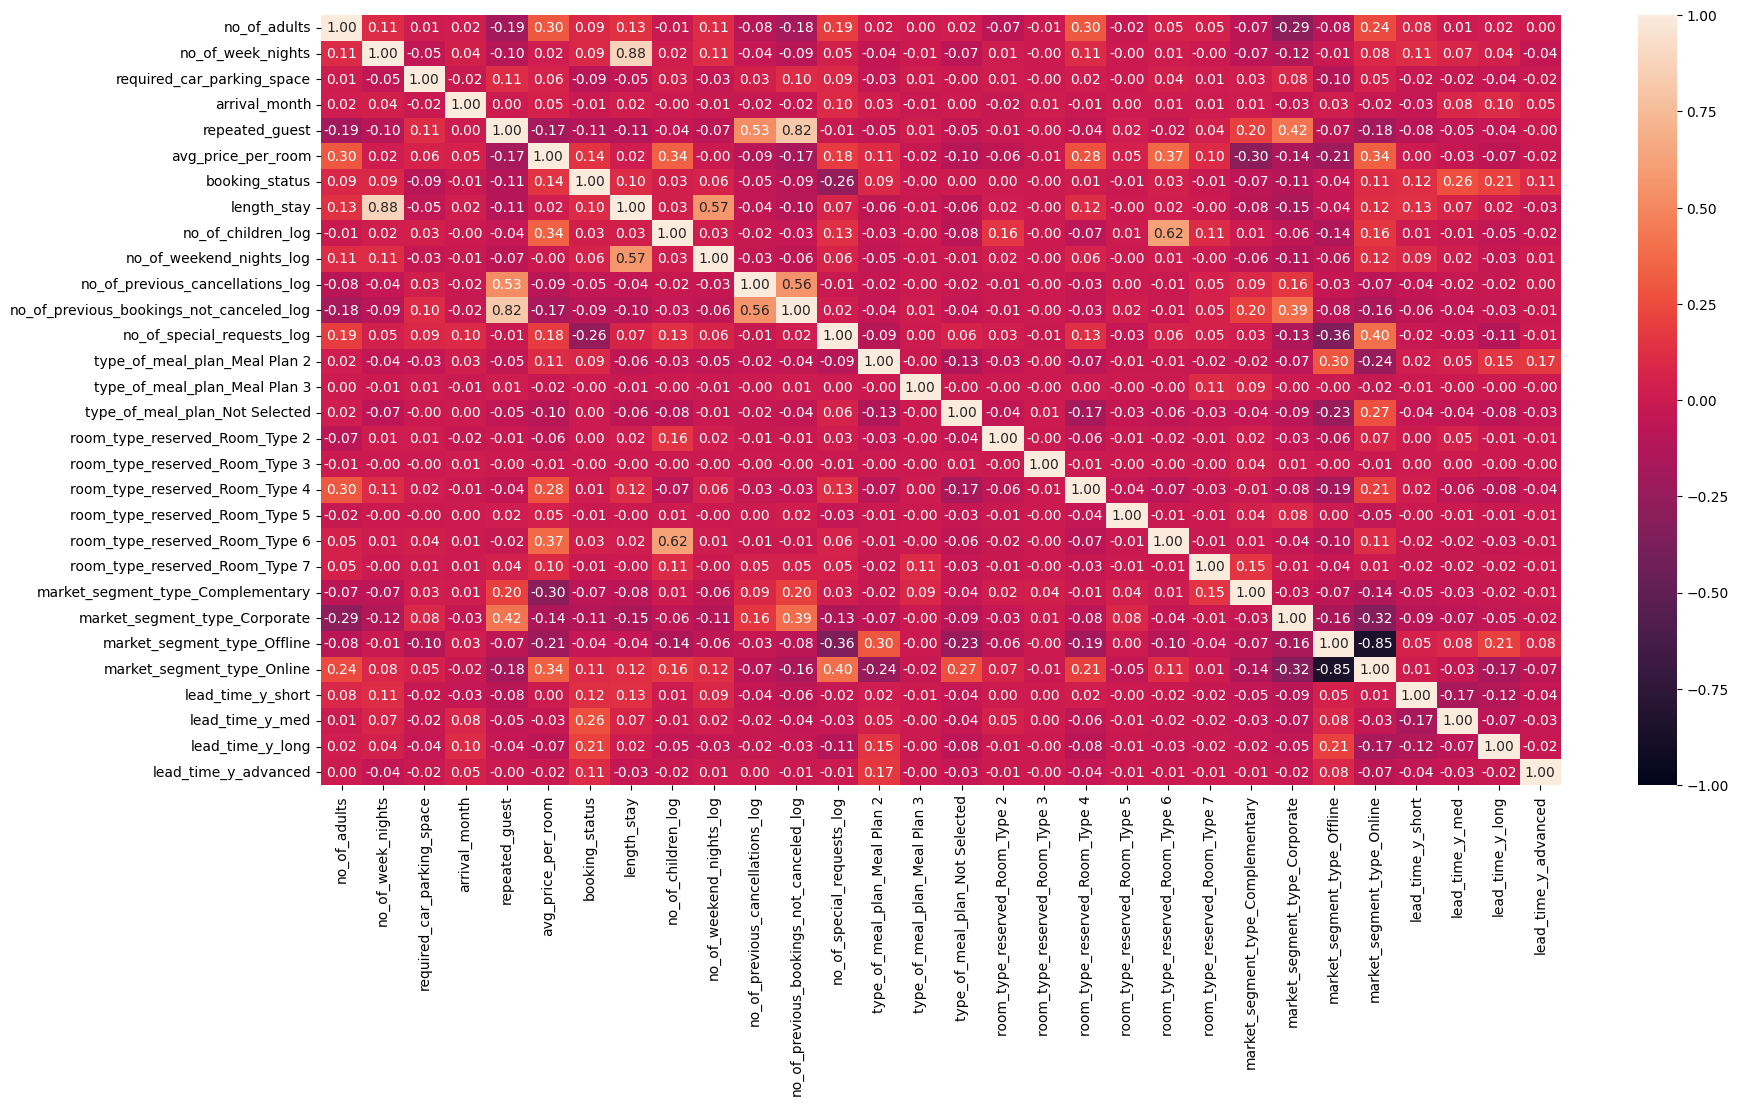

In [63]:
plt.figure(figsize=(20, 10))
sns.heatmap(
    data4.drop(columns=['Booking_ID']).corr(),  # Drop the 'Booking_ID' column
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
)

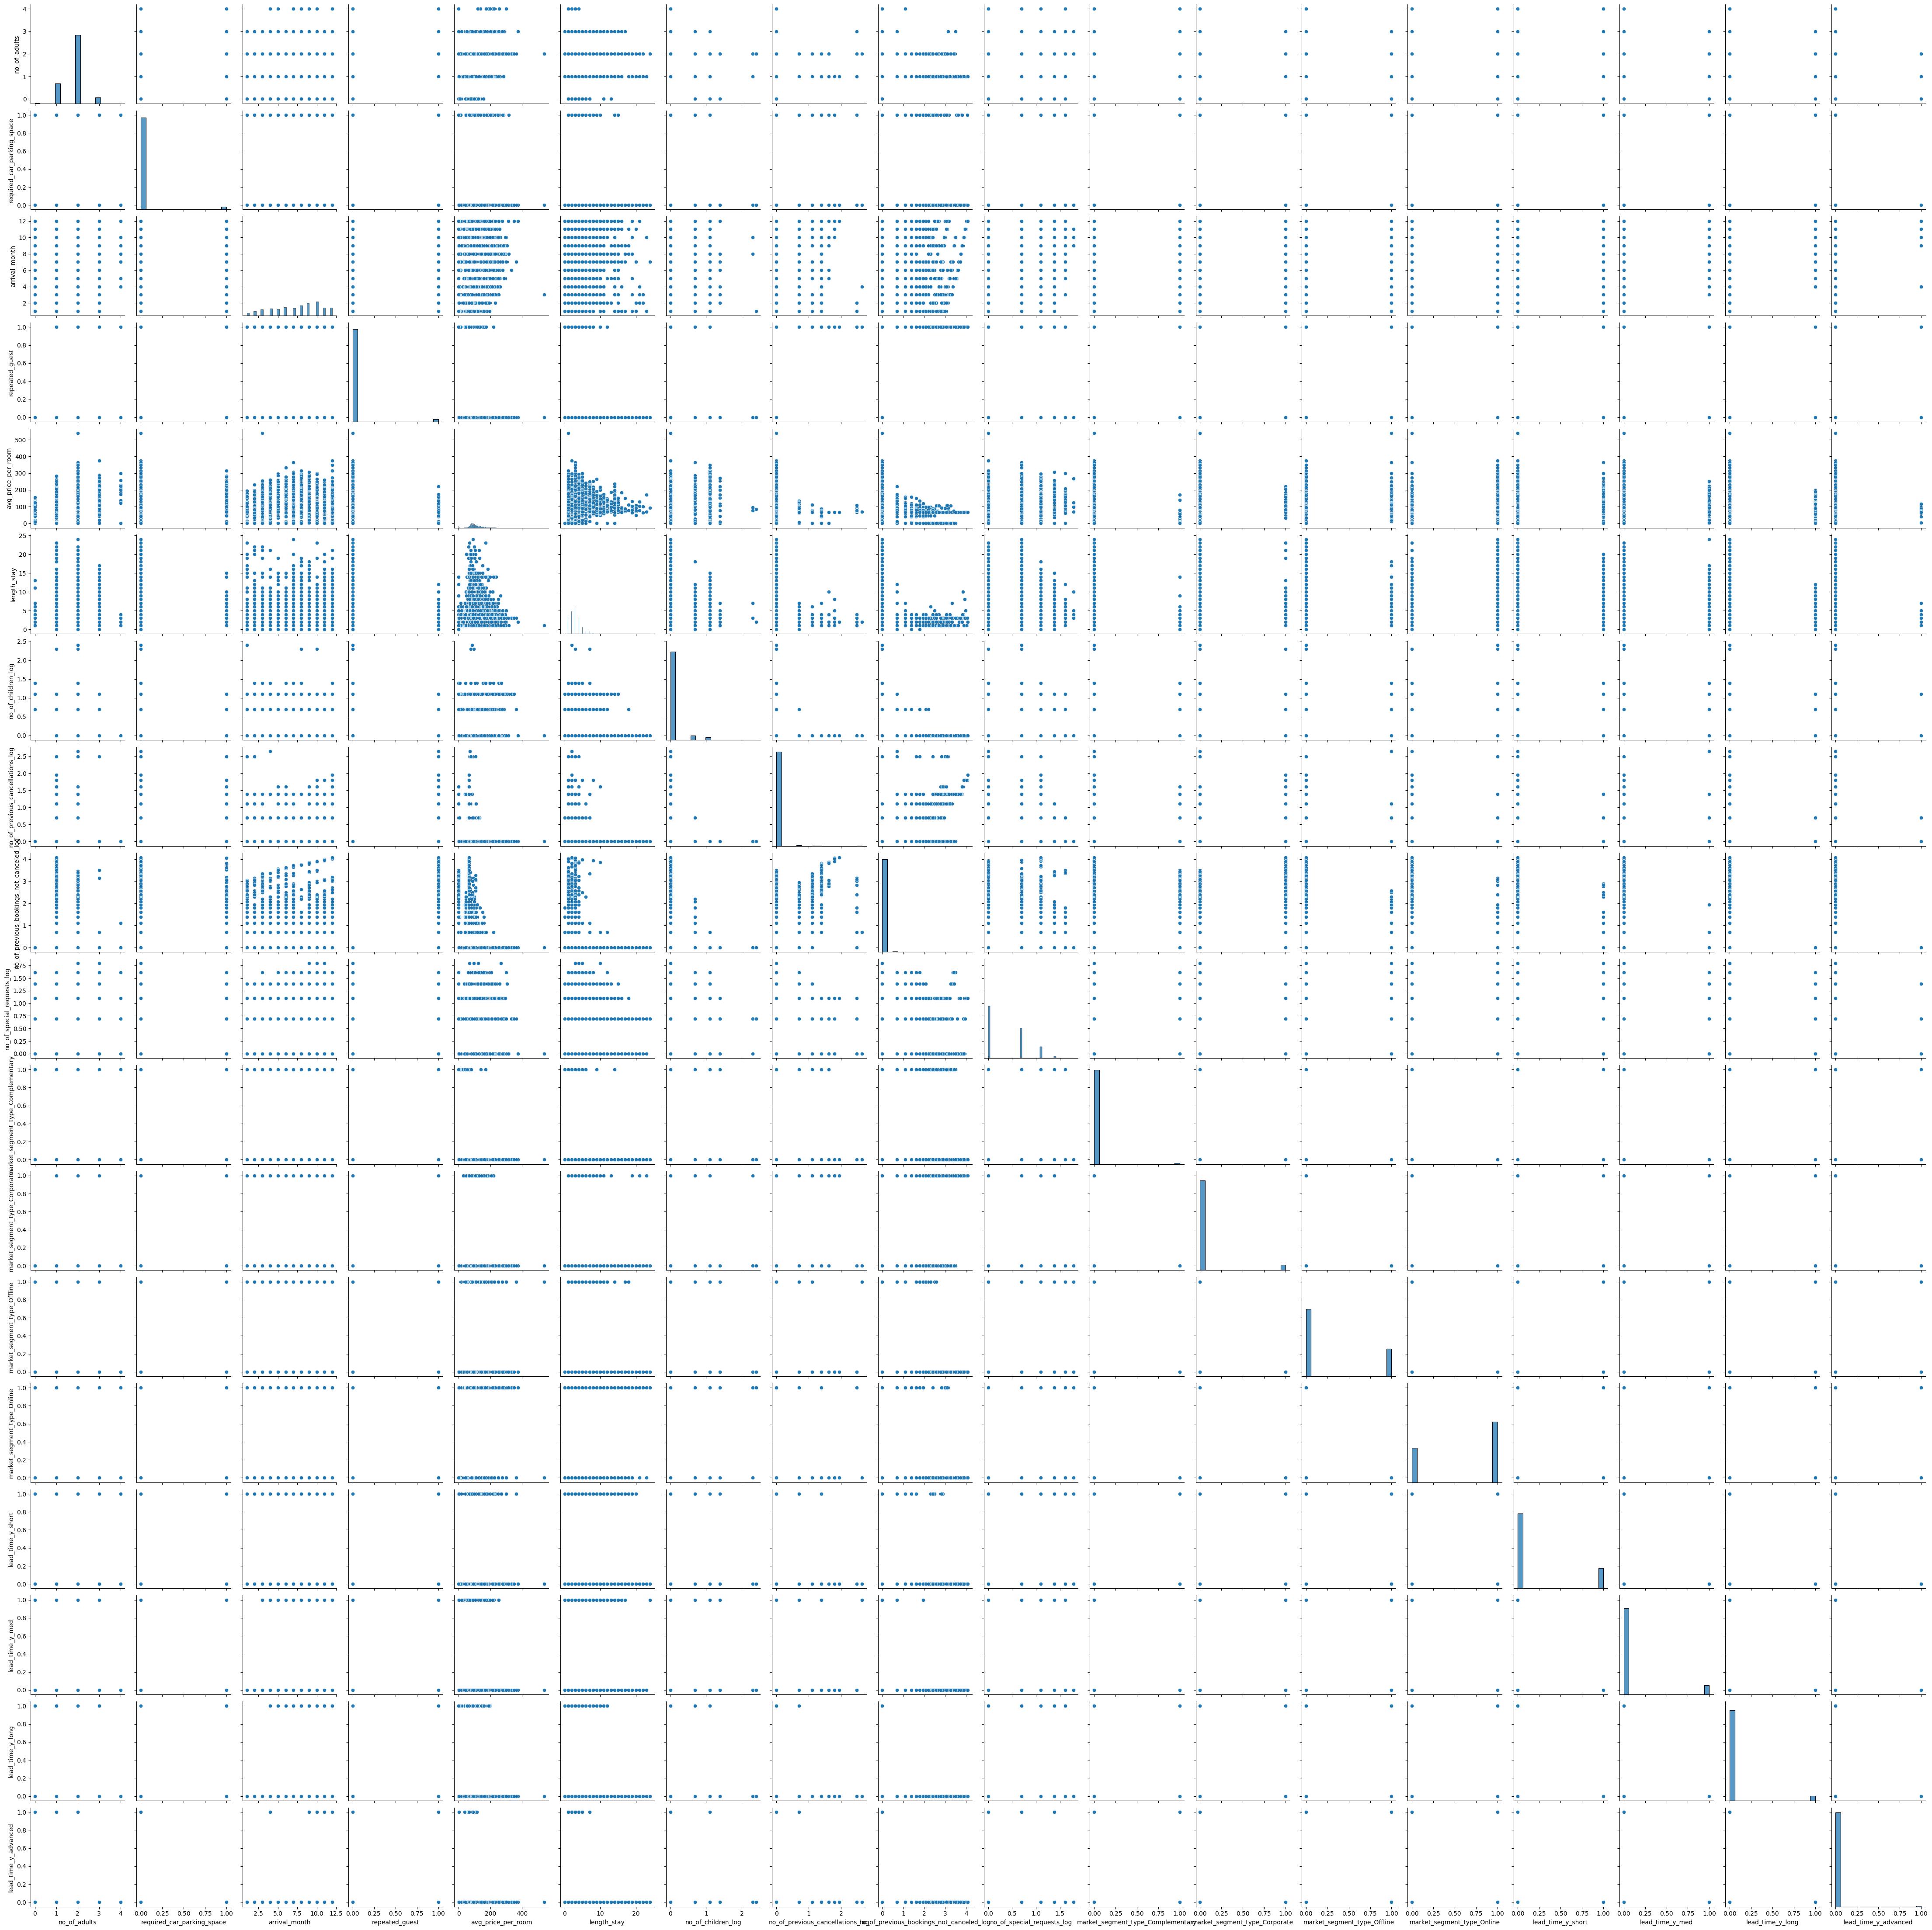

In [64]:
sns.pairplot(data4[['no_of_adults',
 'required_car_parking_space',
 'arrival_month',
 'repeated_guest',
 'avg_price_per_room',
 'length_stay',
 'no_of_children_log',
 'no_of_previous_cancellations_log',
 'no_of_previous_bookings_not_canceled_log',
 'no_of_special_requests_log',
 'market_segment_type_Complementary',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'lead_time_y_short',
 'lead_time_y_med',
 'lead_time_y_long',
 'lead_time_y_advanced']]);

## Insights from EDA
* Late summer to early fall (August to October) is the busiest time of the year.
* Nearly 2/3 of bookings come from online sources.
* Rooms typically rent for around £100, with a variance of £25.
* 545 out of 36,275 room rentals were free of charge during the survey period.
* Online booked rooms tend to have the highest booking costs.
* Repeat guests rarely cancel, indicating high satisfaction.
* Guests with special requests are significantly less likely to cancel their reservation.
* 72% of adult bookers have another adult staying with them.
* 92.6% of bookings do not include children, making them rare at the hotel.
* 52.6% of bookings include at least one weekend night.
* The hotel rarely has long-stay guests.
* Parking is not a significant factor for guests and should not be heavily promoted.
* 90% of bookings are for Type 1 and Type 4 rooms, making other room types largely unnecessary.
* The breakfast-only plan is the most popular; full-board plans are rarely booked.
* The further out rooms are booked, the more likely they are to be canceled.
* The hotel has a robust pricing structure in place.

## Multicolinearity
In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming 'Booking_ID' and potentially other columns are causing the issue
X_train_numeric = X_train.select_dtypes(include=np.number)
# Select only numeric columns

# Optionally, add a constant if your model requires it
X_train_numeric = add_constant(X_train_numeric)

vif_series = pd.Series(
    [variance_inflation_factor(X_train_numeric.values, i) for i in range(X_train_numeric.shape[1])],
    index=X_train_numeric.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                       326.141919
no_of_adults                                  1.346659
no_of_week_nights                           100.277464
required_car_parking_space                    1.041578
arrival_month                                 1.051511
repeated_guest                                3.340040
avg_price_per_room                            1.936037
length_stay                                 146.442538
no_of_children_log                            1.866322
no_of_weekend_nights_log                     34.428764
no_of_previous_cancellations_log              1.597137
no_of_previous_bookings_not_canceled_log      3.508907
no_of_special_requests_log                    1.267959
type_of_meal_plan_Meal Plan 2                 1.217525
type_of_meal_plan_Meal Plan 3                 1.025316
type_of_meal_plan_Not Selected                1.236534
room_type_reserved_Room_Type 2                1.090666
room_type_reserved_Room_Type 3                1.003

In [66]:
#dropping the number of weekend & week nights because I have combined them into one & market segements because they all have large multi values
X_train1 = X_train.drop(['no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary'],
                       axis=1)

## Logistic Regression

In [68]:
import statsmodels.api as sm
logit = sm.Logit(y_train, X_train1.astype(float))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.495871
         Iterations 10


In [69]:
# print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.2175
Time:                        13:07:36   Log-Likelihood:                -12591.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                                -0.4681      0.029    -16.287      0.000      -0.524      -0.412
required_car_parking_space               

In [70]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

no_of_adults                                12.491914
required_car_parking_space                   1.071204
arrival_month                                6.027192
repeated_guest                               3.261774
avg_price_per_room                          11.785501
length_stay                                  3.847471
no_of_children_log                           1.994724
no_of_previous_cancellations_log             1.587243
no_of_previous_bookings_not_canceled_log     3.488713
no_of_special_requests_log                   1.962909
type_of_meal_plan_Meal Plan 2                1.249086
type_of_meal_plan_Meal Plan 3                1.017757
type_of_meal_plan_Not Selected               1.277278
room_type_reserved_Room_Type 2               1.090442
room_type_reserved_Room_Type 3               1.000977
room_type_reserved_Room_Type 4               1.495401
room_type_reserved_Room_Type 5               1.020692
room_type_reserved_Room_Type 6               1.825363
room_type_rese

In [71]:
# test performance
pred_train = lg.predict(X_train1) > 0.5
pred_train = np.round(pred_train)

In [73]:
X_train2 = X_train1.drop(['room_type_reserved_Room_Type 3'], axis=1)
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25392 entries, 13662 to 33003
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   no_of_adults                              25392 non-null  float64
 1   required_car_parking_space                25392 non-null  float64
 2   arrival_month                             25392 non-null  float64
 3   repeated_guest                            25392 non-null  float64
 4   avg_price_per_room                        25392 non-null  float64
 5   length_stay                               25392 non-null  float64
 6   no_of_children_log                        25392 non-null  float64
 7   no_of_previous_cancellations_log          25392 non-null  float64
 8   no_of_previous_bookings_not_canceled_log  25392 non-null  float64
 9   no_of_special_requests_log                25392 non-null  float64
 10  type_of_meal_plan_Meal Plan 2      

In [74]:
logit = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.495874
         Iterations 10


In [75]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.2175
Time:                        13:08:15   Log-Likelihood:                -12591.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                                -0.4681      0.029    -16.288      0.000      -0.524      -0.412
required_car_parking_space               

In [76]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25370
Method:                           MLE   Df Model:                           21
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.2175
Time:                        13:08:26   Log-Likelihood:                -12591.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                                -0.4681      0.029    -16.288      0.000      -0.524      -0.412
required_car_parking_space               

In [77]:
X_train3 = X_train2.drop(['no_of_previous_bookings_not_canceled_log'], axis=1)

In [78]:
logit = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.495986
         Iterations 9


In [79]:
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25371
Method:                           MLE   Df Model:                           20
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.2173
Time:                        13:08:39   Log-Likelihood:                -12594.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
no_of_adults                        -0.4683      0.029    -16.294      0.000      -0.525      -0.412
required_car_parking_space          -1.3023      0.130     -9.990

In [80]:
# let's check the VIF of the predictors again to see if any Multicollinearity persist
vif_series = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

no_of_adults                        12.490957
required_car_parking_space           1.070432
arrival_month                        6.024266
repeated_guest                       1.508687
avg_price_per_room                  11.779585
length_stay                          3.847139
no_of_children_log                   1.994615
no_of_previous_cancellations_log     1.436893
no_of_special_requests_log           1.954548
type_of_meal_plan_Meal Plan 2        1.248869
type_of_meal_plan_Meal Plan 3        1.017727
type_of_meal_plan_Not Selected       1.277195
room_type_reserved_Room_Type 2       1.090437
room_type_reserved_Room_Type 4       1.495362
room_type_reserved_Room_Type 5       1.019842
room_type_reserved_Room_Type 6       1.825094
room_type_reserved_Room_Type 7       1.065168
lead_time_y_short                    1.404488
lead_time_y_med                      1.204925
lead_time_y_long                     1.182492
lead_time_y_advanced                 1.050970
dtype: float64



In [81]:
X_train4 = X_train3.drop(['room_type_reserved_Room_Type 2'], axis=1)

In [82]:
logit = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.496174
         Iterations 9


In [83]:
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.2170
Time:                        13:11:10   Log-Likelihood:                -12599.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
no_of_adults                        -0.4686      0.029    -16.313      0.000      -0.525      -0.412
required_car_parking_space          -1.3091      0.131    -10.031

In [84]:
X_train5 = X_train4.drop(['room_type_reserved_Room_Type 4'], axis=1)

In [87]:
logit = sm.Logit(y_train, X_train1.astype(float))
lg5 = logit.fit()

Optimization terminated successfully.
         Current function value: 0.495871
         Iterations 10


In [88]:
print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25369
Method:                           MLE   Df Model:                           22
Date:                Sun, 05 Jan 2025   Pseudo R-squ.:                  0.2175
Time:                        13:12:20   Log-Likelihood:                -12591.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
no_of_adults                                -0.4681      0.029    -16.287      0.000      -0.524      -0.412
required_car_parking_space               

## Model Performance Evaluation

In [89]:
# converting coefficients to odds
odds = np.exp(lg5.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train5.columns, columns=["odds"]).T

no_of_adults  required_car_parking_space  arrival_month  repeated_guest  \
odds      0.626208                    0.271614       0.871634         0.03872   

      avg_price_per_room  length_stay  no_of_children_log  \
odds            1.008661      0.99672            1.778336   

      no_of_previous_cancellations_log  no_of_special_requests_log  \
odds                          3.615189                    0.187502   

      type_of_meal_plan_Meal Plan 2  type_of_meal_plan_Meal Plan 3  \
odds                       0.808783                       1.715506   

      type_of_meal_plan_Not Selected  room_type_reserved_Room_Type 5  \
odds                        1.812164                        0.537525   

      room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
odds                        1.102666                        0.971806   

      lead_time_y_short  lead_time_y_med  lead_time_y_long  \
odds           3.183673        15.201848         17.799987   

      lead_time_y_advanced  
odds             78.372467

In [90]:
# finding the percentage change
perc_change_odds = (np.exp(lg5.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train3.columns, columns=["change_odds%"]).T

no_of_adults  required_car_parking_space  arrival_month  \
change_odds%    -37.379158                  -72.838573     -12.836632   

              repeated_guest  avg_price_per_room  length_stay  \
change_odds%      -96.127954              0.8661    -0.328037   

              no_of_children_log  no_of_previous_cancellations_log  \
change_odds%           77.833553                        261.518881   

              no_of_special_requests_log  type_of_meal_plan_Meal Plan 2  \
change_odds%                  -81.249755                     -19.121665   

              type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
change_odds%                      71.550648                       81.216432   

              room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 4  \
change_odds%                      -30.490216                       78.012909   

              room_type_reserved_Room_Type 5  room_type_reserved_Room_Type 6  \
change_odds%                      -46.247491                       10.266573   

              room_type_reserved_Room_Type 7  lead_time_y_short  \
change_odds%                       -2.819364         218.367322   

              lead_time_y_med  lead_time_y_long  lead_time_y_advanced  
change_odds%      1420.184806       1679.998717           7737.246743

In [92]:
lg5 = sm.Logit(y_train, X_train5.astype(float)).fit()

pred_train4 = lg5.predict(X_train5)
pred_train4 = np.round(pred_train4)

Optimization terminated successfully.
         Current function value: 0.499373
         Iterations 9


## Final Model Summary

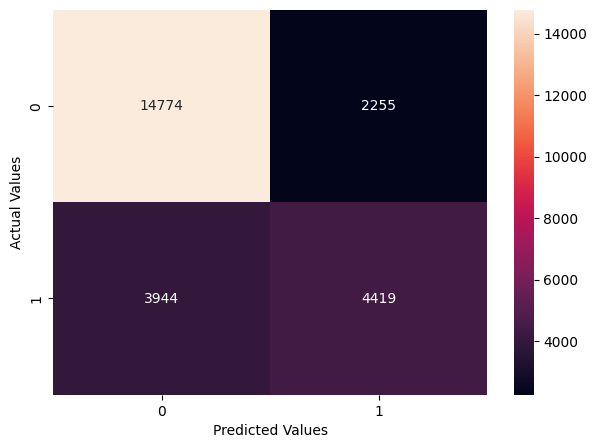

In [93]:
# another confusion matrix
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

In [96]:
print("Accuracy  :", accuracy_score(y_train, pred_train4))
print("Precision :", precision_score(y_train, pred_train4))
print("Recall    :", recall_score(y_train, pred_train4))
print("F1 Score  :", f1_score(y_train, pred_train4))

Accuracy  : 0.7558679899180845
Precision : 0.662121666167216
Recall    : 0.528398899916298
F1 Score  : 0.5877502161335373


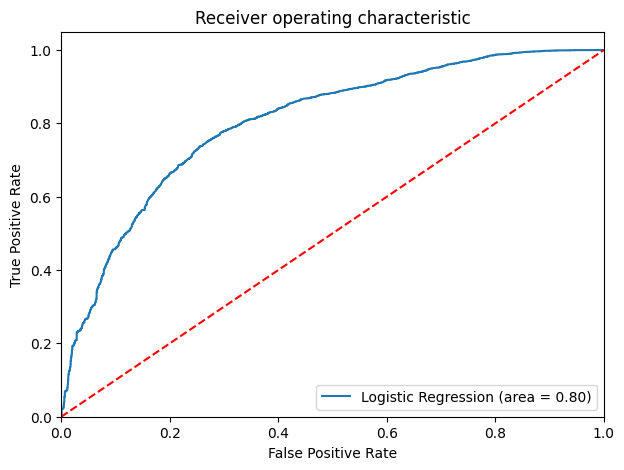

In [97]:
logit_roc_auc_train = roc_auc_score(y_train, lg5.predict(X_train5))
fpr, tpr, thresholds = roc_curve(y_train, lg5.predict(X_train5))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

In [99]:
X_test1 = X_test.drop([ 'no_of_weekend_nights_log',
                         'no_of_week_nights',
                         'market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary',
                       'room_type_reserved_Room_Type 3',
                       'room_type_reserved_Room_Type 4',
                       'no_of_previous_bookings_not_canceled_log',
                       'room_type_reserved_Room_Type 2',
                       # 'Booking_ID'  # This column was dropped during training but not in testing - removing from the list to drop
                     ], axis=1)

In [101]:
pred_test = lg5.predict(X_test1) > 0.5
pred_test = np.round(pred_test)
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))
print("Precision on training set : ", precision_score(y_train, pred_train4))
print("Precision on test set : ", precision_score(y_test, pred_test))
print("Recall on training set : ", recall_score(y_train, pred_train4))
print("Recall on test set : ", recall_score(y_test, pred_test))
print("F1 Score on training set : ", f1_score(y_train, pred_train4))
print("F1 Score on test set : ", f1_score(y_test, pred_test))

Accuracy on training set :  0.7558679899180845
Accuracy on test set :  0.764678856932831
Precision on training set :  0.662121666167216
Precision on test set :  0.6690116074569117
Recall on training set :  0.528398899916298
Recall on test set :  0.5400340715502555
F1 Score on training set :  0.5877502161335373
F1 Score on test set :  0.597643362136685


# Logistic Regression Insights
* The model now achieves 76.5% accuracy, indicating a stronger ability to generalize and predict cancellations.
* Precision (67%) and recall (54%) show a balanced improvement, meaning the model can better predict cancellations while reducing false positives and negatives.
* With enhanced performance, the hotel can more effectively identify likely cancellations, allowing for proactive measures such as overbooking strategies or targeted promotions.
* While improved, focusing on advanced models (e.g., Gradient Boosting) and fine-tuning parameters could further boost recall, capturing even more cancellations.







## KNN Classifier

In [111]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [113]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
evaluate_model(y_test, y_pred_knn, "KNN Classifier")


Performance Metrics for KNN Classifier:
Accuracy: 0.81
Precision: 0.73
Recall: 0.64
F1 Score: 0.68
Confusion Matrix:
[[6536  825]
 [1273 2249]]


# Model Improvement

In [122]:
from sklearn.model_selection import GridSearchCV

param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
# Now GridSearchCV should be defined
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)
best_knn = grid_knn.best_estimator_
y_pred_best_knn = best_knn.predict(X_test)
evaluate_model(y_test, y_pred_best_knn, "Tuned KNN Classifier")


Performance Metrics for Tuned KNN Classifier:
Accuracy: 0.81
Precision: 0.72
Recall: 0.66
F1 Score: 0.69
Confusion Matrix:
[[6448  913]
 [1180 2342]]


# KNN Insights
* The model correctly classifies 81% of the data, showing solid overall performance.
* With a precision of 0.72, the model correctly identifies 72% of positive instances.
* The recall of 0.66 indicates the model captures 66% of all actual positive cases, though there's room for improvement in detecting all positives.
* The F1 score of 0.69 balances precision and recall, indicating a moderate trade-off between false positives and false negatives.

## Naive Bayes

In [114]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

In [117]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
evaluate_model(y_test, y_pred_nb, "Naive Bayes")


Performance Metrics for Naive Bayes:
Accuracy: 0.41
Precision: 0.35
Recall: 0.97
F1 Score: 0.51
Confusion Matrix:
[[1017 6344]
 [ 118 3404]]


# Naives Bayes
* The model has a low accuracy of 41%, indicating it struggles to correctly classify the majority of data.
* With a precision of 0.35, the model only correctly identifies 35% of the predicted positive cases, leading to many false positives.
* The model performs well in recall with 0.97, capturing 97% of the actual positive cases, but this comes at the cost of many false positives.
* The F1 score of 0.51 reflects the imbalance between precision and recall, indicating that while recall is high, the low precision leads to a less balanced performance.

## SVM

In [123]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [124]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
evaluate_model(y_test, y_pred_svm, "SVM Classifier")


Performance Metrics for SVM Classifier:
Accuracy: 0.68
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion Matrix:
[[7361    0]
 [3522    0]]


# Model Improvement

In [127]:
from sklearn.model_selection import RandomizedSearchCV
param_dist_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
random_search_svm = RandomizedSearchCV(SVC(), param_dist_svm, n_iter=4, cv=3, scoring='f1', n_jobs=-1, random_state=42)
random_search_svm.fit(X_train, y_train)
best_svm = random_search_svm.best_estimator_
y_pred_best_svm = best_svm.predict(X_test)
evaluate_model(y_test, y_pred_best_svm, "Tuned SVM Classifier")


Performance Metrics for Tuned SVM Classifier:
Accuracy: 0.80
Precision: 0.72
Recall: 0.61
F1 Score: 0.66
Confusion Matrix:
[[6518  843]
 [1374 2148]]


# SVM Insights
* The model has an accuracy of 0.80, indicating good overall performance.
* Precision of 0.72 suggests the model has a relatively low false positive rate.
* Recall is 0.61, meaning it misses 39% of the positive cases, showing room for improvement.
* The confusion matrix shows 1,374 false negatives and 843 false positives, indicating potential adjustments to improve positive class detection.

## Model Comparison

In [131]:
print("\nFinal Model Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred_test))
print("KNN Classifier Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("SVM Classifier Accuracy:", accuracy_score(y_test, y_pred_best_svm))


Final Model Comparison:
Logistic Regression Accuracy: 0.764678856932831
KNN Classifier Accuracy: 0.8076817054121106
Naive Bayes Accuracy: 0.4062298998437931
SVM Classifier Accuracy: 0.796287788293669


# Model Comparison Insights
* KNN Classifier has the highest accuracy at 0.81, making it the most accurate model overall.
SVM Classifier follows closely with an accuracy of 0.80, offering strong performance but slightly less than KNN.
* Logistic Regression (0.76) performs decently but lags behind KNN and SVM in terms of accuracy.
* Naive Bayes (0.41) performs poorly with a significantly lower accuracy, making it unsuitable for this task.
* Choose KNN Classifier for the best performance, as it has the highest accuracy, followed closely by SVM if computational efficiency is a concern.

## Conclusion and Business Recommendations


### Conclusions:

* The most influential variables for cancellations were lead time, special requests, and the average price of the room.
* Bookings made within 151 days (approximately 5 months) of the stay were far less likely to be canceled compared to those made earlier.

* Guests who made special requests alongside their bookings were significantly less likely to cancel.

* Rooms priced over €100.04 had a higher likelihood of cancellation, likely because guests booked early and later found better deals elsewhere.

### Business Recommendations:

* Provide your best room rates for bookings made more than 5 months in advance to secure early reservations. After this period, consider slightly increasing prices to maximize profit.

* Require a nonrefundable deposit for bookings made more than 5 months in advance to minimize cancellations and secure revenue.

* Replace the standard Full Board option with a menu of special requests that guests can choose from during booking, encouraging additional engagement and upselling opportunities, even for complimentary items.

* Offer VIP perks like a champagne toast at sunset on the first night to create a memorable experience.

* Promote additional amenities such as room upgrades, premium WiFi, laundry bags, and slippers to increase revenue.

* Reassess October's pricing structure to ensure it aligns with demand and doesn't peak too early, potentially losing out on last-minute bookings.